In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)

### Importing 'application_data.csv' file

In [4]:
# Reading the 'application_data.csv' file from local and storing in the dataset in the data frame name 'app_df'

app_df = pd.read_csv('application_data.csv')

In [5]:
# Validating the dataset's shape and statistical description

app_df.shape

(307511, 122)

In [6]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [7]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

# 1. Treating missing values and analysing data quality

In [9]:
# Finding the column names with null value percentages and storing them with the name "columns_with_null".

columns_with_null= (app_df.isnull().sum()/app_df.isnull().count())*100
columns_with_null

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [10]:
# Finding the columns which are having the null values more than or equal to 40%

columns_with_null[columns_with_null.values>=40]

OWN_CAR_AGE                     65.990810
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49

In [11]:
len((columns_with_null[columns_with_null>=40]))

49



- We have 49 columns which are having more than 40% missing values. So, removing these columns from the data frame.

In [12]:
app_df.drop(app_df.columns[columns_with_null>=40],axis=1, inplace=True)

In [13]:
app_df.shape

(307511, 73)

- Now, we have 73 columns.
- Remove the rows which are having missing values of less than 1%. This will not affect our analysis

In [14]:
# Finding the balance columns which are having missing values. 

columns_with_null= (app_df.isnull().sum()/app_df.isnull().count())*100
columns_with_null[ columns_with_null>0]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
OCCUPATION_TYPE               31.345545
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

In [15]:
app_df['OCCUPATION_TYPE'].value_counts(normalize=True,dropna=False)*100

NaN                      31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

- Missing values in the column 'OCCUPATION_TYPE' cannot be imputed with the other occupations. So, either we can leave the missing values as it is or we can replace the missing value as 'Unknown'.


- Here we are replacing the missing value with 'Unknown'

In [16]:
# Replacing 'NaN' values in the column name 'OCCUPATION_TYPE' with the value 'Unknown'

app_df['OCCUPATION_TYPE'].fillna(value="Unknown",inplace=True)

In [17]:
columns_with_null= (app_df.isnull().sum()/app_df.isnull().count())*100
columns_with_null[ columns_with_null>0]

AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
CNT_FAM_MEMBERS                0.000650
EXT_SOURCE_2                   0.214626
EXT_SOURCE_3                  19.825307
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
DAYS_LAST_PHONE_CHANGE         0.000325
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
dtype: float64

- Deleting the rows where the missing values are less than 1% in each column.

In [18]:
# Row numbers that need to be deleted.
row_nums= app_df[app_df[columns_with_null[np.logical_and(columns_with_null>0, columns_with_null <=1)].index].isnull().sum(axis=1)>0].index

In [19]:
# Dropping the rows from the dataset.
app_df.drop(row_nums,axis=0,inplace=True)

In [20]:
# Checking the shape of the data frame.
app_df.shape

(304531, 73)

In [21]:
# Checking the balance columns which are having null values.
columns_with_null= (app_df.isnull().sum()/app_df.isnull().count())*100
columns_with_null[ columns_with_null>0]

EXT_SOURCE_3                  19.784849
AMT_REQ_CREDIT_BUREAU_HOUR    13.498790
AMT_REQ_CREDIT_BUREAU_DAY     13.498790
AMT_REQ_CREDIT_BUREAU_WEEK    13.498790
AMT_REQ_CREDIT_BUREAU_MON     13.498790
AMT_REQ_CREDIT_BUREAU_QRT     13.498790
AMT_REQ_CREDIT_BUREAU_YEAR    13.498790
dtype: float64

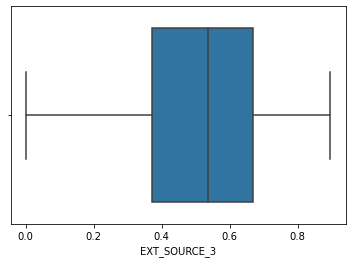

In [22]:
sns.boxplot(app_df['EXT_SOURCE_3']);

In [23]:
print('Median:',app_df['EXT_SOURCE_3'].median(),'\nMean:', app_df['EXT_SOURCE_3'].mean())

Median: 0.5352762504724826 
Mean: 0.5107644199098772


- The median and mean values are nearly the same for the column 'EXT_SOURCE_3'.
- As per the above box plot, we don't have any outliers present in this column. So, we can use the mean value to replace the missing values.

In [24]:
app_df['EXT_SOURCE_3'].fillna(app_df['EXT_SOURCE_3'].mean(),inplace=True)

In [25]:
# Checking the balance columns which are having null values.
columns_with_null= (app_df.isnull().sum()/app_df.isnull().count())*100
columns_with_null[ columns_with_null>0]

AMT_REQ_CREDIT_BUREAU_HOUR    13.49879
AMT_REQ_CREDIT_BUREAU_DAY     13.49879
AMT_REQ_CREDIT_BUREAU_WEEK    13.49879
AMT_REQ_CREDIT_BUREAU_MON     13.49879
AMT_REQ_CREDIT_BUREAU_QRT     13.49879
AMT_REQ_CREDIT_BUREAU_YEAR    13.49879
dtype: float64

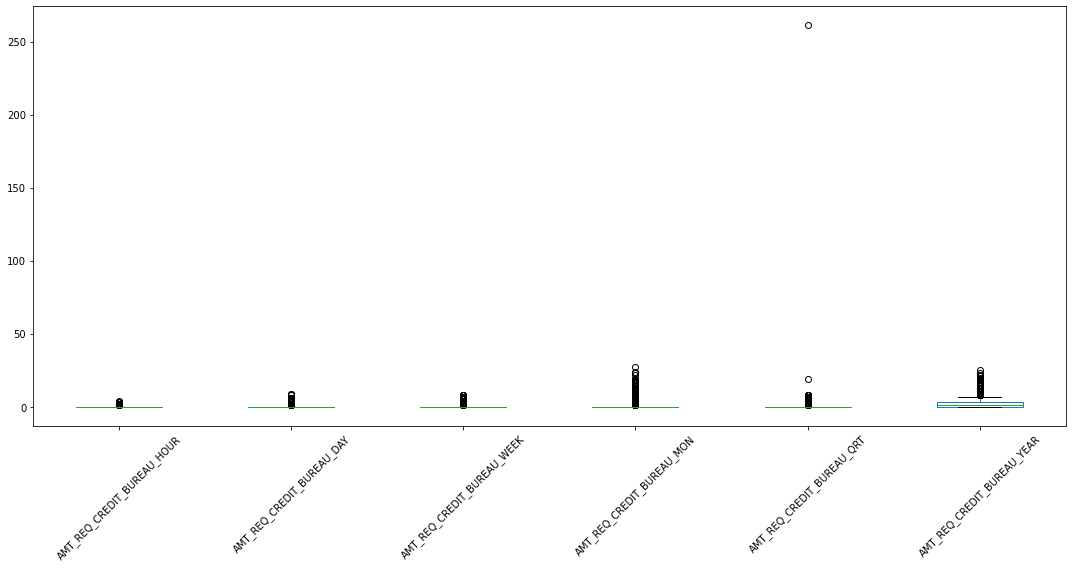

In [26]:
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].plot(kind='box',figsize=(15,8))
plt.xticks(rotation=45)
plt.tight_layout()

### Observations
- The column 'AMT_REQ_CREDIT_BUREAU_QRT' have an outlier that has a value more than 250 which is abnormal. So, we can treat the missing value for this column separately

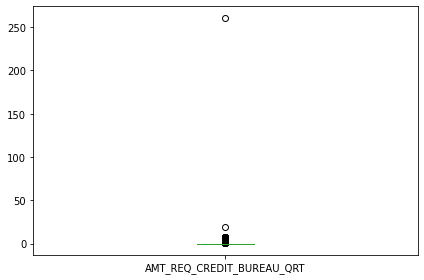

In [27]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].plot(kind='box')
plt.tight_layout()

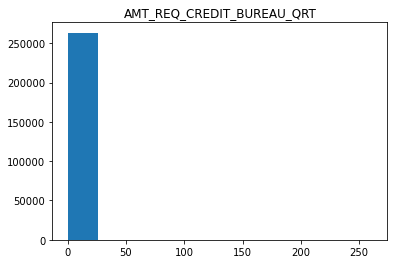

In [28]:
plt.hist(app_df['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.title('AMT_REQ_CREDIT_BUREAU_QRT');

In [29]:
print('Median:',app_df['AMT_REQ_CREDIT_BUREAU_QRT'].median(),'\nMean:', app_df['AMT_REQ_CREDIT_BUREAU_QRT'].mean())

Median: 0.0 
Mean: 0.2661271035558778


- Since we have the outlier which is completely out of the normal range. We can impute the missing values with Median.

In [30]:
app_df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app_df['AMT_REQ_CREDIT_BUREAU_QRT'].median(),inplace=True)

In [31]:
columns_with_null= (app_df.isnull().sum()/app_df.isnull().count())*100
columns_with_null[ columns_with_null>0]

AMT_REQ_CREDIT_BUREAU_HOUR    13.49879
AMT_REQ_CREDIT_BUREAU_DAY     13.49879
AMT_REQ_CREDIT_BUREAU_WEEK    13.49879
AMT_REQ_CREDIT_BUREAU_MON     13.49879
AMT_REQ_CREDIT_BUREAU_YEAR    13.49879
dtype: float64

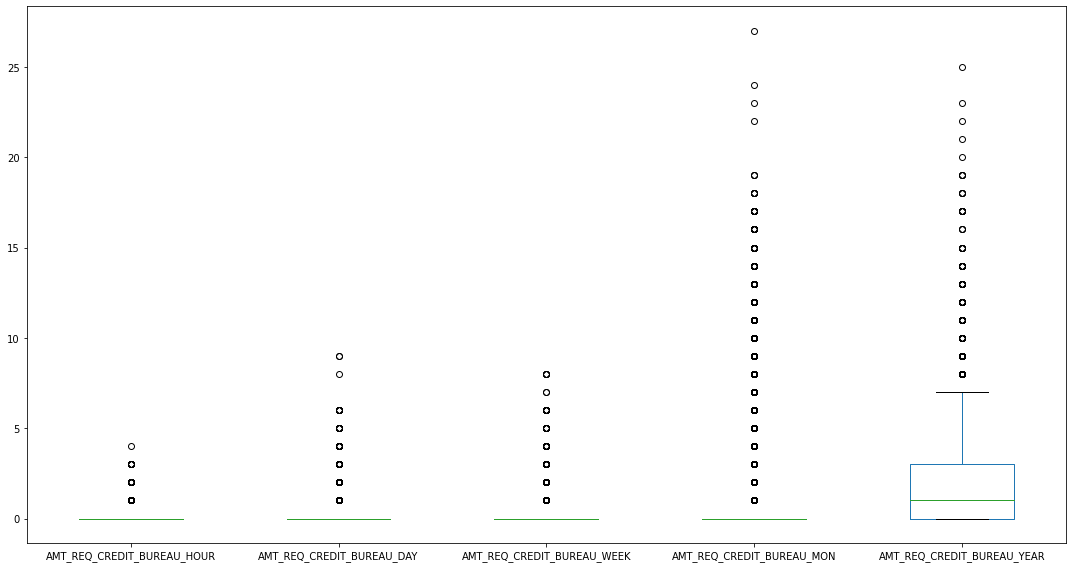

In [32]:
# Now we can deal with the balance columns by using boxplot.
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']].plot(kind='box',figsize=(15,8))
plt.tight_layout()

In [33]:
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']].mean()

AMT_REQ_CREDIT_BUREAU_HOUR    0.006385
AMT_REQ_CREDIT_BUREAU_DAY     0.006981
AMT_REQ_CREDIT_BUREAU_WEEK    0.034484
AMT_REQ_CREDIT_BUREAU_MON     0.267782
AMT_REQ_CREDIT_BUREAU_YEAR    1.905904
dtype: float64

In [34]:
app_df[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']].median()

AMT_REQ_CREDIT_BUREAU_HOUR    0.0
AMT_REQ_CREDIT_BUREAU_DAY     0.0
AMT_REQ_CREDIT_BUREAU_WEEK    0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    1.0
dtype: float64

### Observations
- Outliers are biasing the mean values for the columns 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_YEAR'.
- So, we can use the median value of each column to fill the null values.

In [35]:
for x in columns_with_null[columns_with_null.values>0].index:
    app_df[x].fillna(app_df[x].median(),inplace=True)

In [36]:
columns_with_null= (app_df.isnull().sum()/app_df.isnull().count())*100
columns_with_null[ columns_with_null>0]

Series([], dtype: float64)

- As per the above code, we could see that there are no more missing values present in the dataset.

## Validating the data in non-numeric columns

In [37]:
app_df.shape

(304531, 73)

In [38]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304531 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   304531 non-null  int64  
 1   TARGET                       304531 non-null  int64  
 2   NAME_CONTRACT_TYPE           304531 non-null  object 
 3   CODE_GENDER                  304531 non-null  object 
 4   FLAG_OWN_CAR                 304531 non-null  object 
 5   FLAG_OWN_REALTY              304531 non-null  object 
 6   CNT_CHILDREN                 304531 non-null  int64  
 7   AMT_INCOME_TOTAL             304531 non-null  float64
 8   AMT_CREDIT                   304531 non-null  float64
 9   AMT_ANNUITY                  304531 non-null  float64
 10  AMT_GOODS_PRICE              304531 non-null  float64
 11  NAME_TYPE_SUITE              304531 non-null  object 
 12  NAME_INCOME_TYPE             304531 non-null  object 
 13 

In [39]:
# Seperating non-numaeric columns to validate
non_numeric_columns= list(set(app_df.columns) - set(app_df.describe().columns))
non_numeric_columns

['NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS']

In [40]:
len(non_numeric_columns)

12

In [41]:
for x in non_numeric_columns:
    print(app_df[x].value_counts())

House / apartment      270243
With parents            14693
Municipal apartment     11079
Rented apartment         4829
Office apartment         2583
Co-op apartment          1104
Name: NAME_HOUSING_TYPE, dtype: int64
Business Entity Type 3    67270
XNA                       54852
Self-employed             38048
Other                     16546
Medicine                  11078
Business Entity Type 2    10458
Government                10308
School                     8823
Trade: type 7              7769
Kindergarten               6823
Construction               6659
Business Entity Type 1     5919
Transport: type 4          5353
Trade: type 3              3443
Industry: type 9           3328
Industry: type 3           3254
Security                   3215
Housing                    2935
Industry: type 11          2685
Military                   2610
Bank                       2455
Agriculture                2436
Police                     2319
Transport: type 2          2184
Postal        

### Observations
- In the columns 'CODE_GENDER' and 'ORGANIZATION_TYPE' we have 'XNA' data.
- We have 'XNA' values 4 rows(less than 1%)  in 'CODE_GENDER' and 54852 rows (18%) in 'ORGANIZATION_TYPE'
- We can remove these rows.

In [42]:
app_df.drop(app_df[app_df['CODE_GENDER']=='XNA'].index,axis=0,inplace=True)

In [43]:
app_df.drop(app_df[app_df['ORGANIZATION_TYPE']=='XNA'].index,axis=0,inplace=True)

In [44]:
app_df.shape

(249675, 73)

In [45]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [46]:
# Removing the unwanted columns from the data frame.
unwanted_cols = ['FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION','OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2',
        'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT']

In [47]:
app_df.drop(unwanted_cols,axis=1,inplace=True)

In [48]:
app_df.shape

(249675, 38)

In [49]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,0,0,0,School,0.622246,0.510764,0.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,0,0,0,Government,0.555912,0.729567,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,0,0,0,Business Entity Type 3,0.650442,0.510764,0.0,0.0,-617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,0,1,1,Religion,0.322738,0.510764,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0


- Column names 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH' and 'DAYS_LAST_PHONE_CHANGE' are having the values in negative.


- Changing the negative value in positive value using abs() function.

In [50]:
app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = app_df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].abs()

In [51]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,0,0,0,School,0.622246,0.510764,0.0,0.0,828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,0,0,0,Government,0.555912,0.729567,0.0,0.0,815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,Laborers,2.0,0,0,0,Business Entity Type 3,0.650442,0.510764,0.0,0.0,617.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,Core staff,1.0,0,1,1,Religion,0.322738,0.510764,0.0,0.0,1106.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# Check whether the 'DAYS_BIRTH' and 'DAYS_EMPLOYED' columns are having correct values.
sum(app_df['DAYS_BIRTH']-app_df['DAYS_EMPLOYED']<(17*365))

0

In [53]:
app_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

# Converting numerical data to categorical for the analysis
## Creating bins for the amount columns

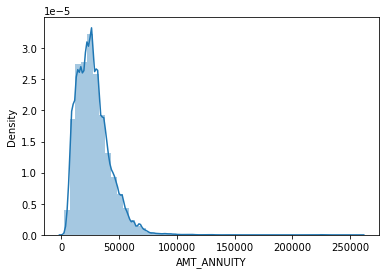

In [54]:
# Creating bins for the column 'AMT_ANNUITY'
sns.distplot(app_df['AMT_ANNUITY']);

In [55]:
bins = [0,20000,50000,100000,10000000000]
bin_range = ['Low','Medium','High','Very high']

app_df['AMT_ANNUITY_RANGE']=pd.cut(app_df['AMT_ANNUITY'],bins,labels=bin_range)

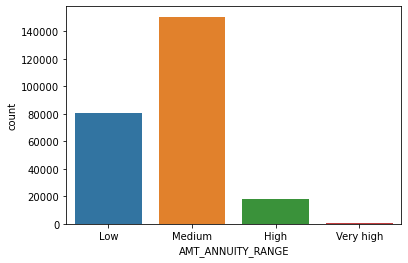

In [56]:
# Plotting range values
sns.countplot(app_df['AMT_ANNUITY_RANGE']);

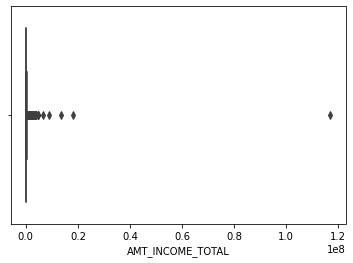

In [57]:
# Creating bins for the column 'AMT_INCOME_TOTAL'
sns.boxplot(app_df['AMT_INCOME_TOTAL']);

In [58]:
bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000]
bin_range = ['0-50000','50000-100000','100000-150000', '150000-200000','200000-250000','250000-300000',
             '300000-350000','350000-400000','400000-450000','450000-500000','500000 and above']

app_df['AMT_INCOME_RANGE']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins,labels=bin_range)

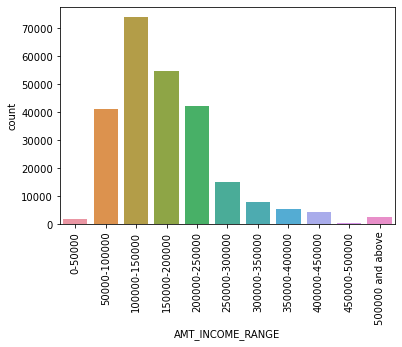

In [59]:
# Plotting range values
sns.countplot(app_df['AMT_INCOME_RANGE'])
plt.xticks(rotation=90);

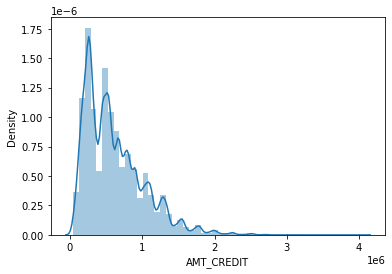

In [60]:
# Creating bins for the column 'AMT_CREDIT'
sns.distplot(app_df['AMT_CREDIT']);

In [61]:
bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000000]
bin_range = ['0-100000', '100000-200000','200000-300000', '300000-400000','400000-500000','500000-600000','600000-700000','700000-800000',
        '800000-900000','900000 and above']

app_df['AMT_CREDIT_RANGE']=pd.cut(app_df['AMT_CREDIT'],bins=bins,labels=bin_range)

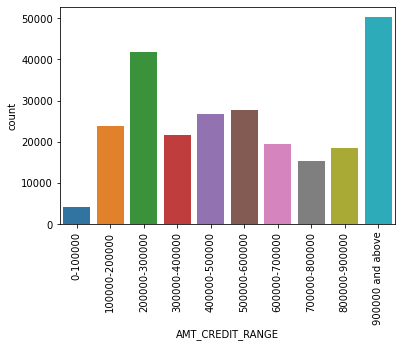

In [62]:
# Plotting range values
sns.countplot(app_df['AMT_CREDIT_RANGE'])
plt.xticks(rotation=90);

### Validating the imbalance in the target column.

In [63]:
sum(app_df['TARGET']==1)

21700

In [64]:
sum(app_df['TARGET']==0)

227975

In [65]:
sum(app_df['TARGET']==1)/sum(app_df['TARGET']==0)*100

9.518587564425923

### Observations
- The target column is having a huge imbalance with a ratio of around 10:90
- So, we can create two separate data frames for both target categories and start the analysis on each data frame.

In [66]:
# Creating two dataframes using the 'TARGET' column.

target0_df = app_df[app_df['TARGET']==0]
target1_df = app_df[app_df['TARGET']==1]

In [67]:
target0_df.shape

(227975, 41)

In [68]:
target1_df.shape

(21700, 41)

# 2. Analysing the both targets dataframes

## Univariate analysis

### Creating a function 'plotting' to create mutiple plots.

In [69]:
def plotting(df1, target0, target1, column):
     
    fig = plt.figure(figsize=(13,10))
    
    # Creating pie plot with the complete dataframe for the given column
    ax1 = plt.subplot(221)
    df1[column].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    # Creating count plot with the complete dataframe for the given column
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = df1, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')

    # Creating bar plot in percentage for each target data frames.
    ax3 = plt.subplot(223)
    df2 = pd.DataFrame()
    df2['0']= ((target0[column].value_counts())/len(target0))
    df2['1']= ((target1[column].value_counts())/len(target1))
    df2.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout()

    plt.show()

In [70]:
# Creating separate lists for categorical and numerical columns.
num_columns = app_df.describe().columns
num_columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [71]:
cat_columns = list(set(app_df.columns)-set(num_columns))
cat_columns

['NAME_HOUSING_TYPE',
 'AMT_ANNUITY_RANGE',
 'ORGANIZATION_TYPE',
 'AMT_INCOME_RANGE',
 'FLAG_OWN_REALTY',
 'OCCUPATION_TYPE',
 'FLAG_OWN_CAR',
 'NAME_CONTRACT_TYPE',
 'NAME_TYPE_SUITE',
 'NAME_EDUCATION_TYPE',
 'NAME_INCOME_TYPE',
 'AMT_CREDIT_RANGE',
 'CODE_GENDER',
 'NAME_FAMILY_STATUS']

In [72]:
((target1_df['NAME_INCOME_TYPE'].value_counts())/len(target1_df))

Working                 0.697558
Commercial associate    0.245253
State servant           0.057097
Maternity leave         0.000092
Name: NAME_INCOME_TYPE, dtype: float64

Plotting NAME_HOUSING_TYPE


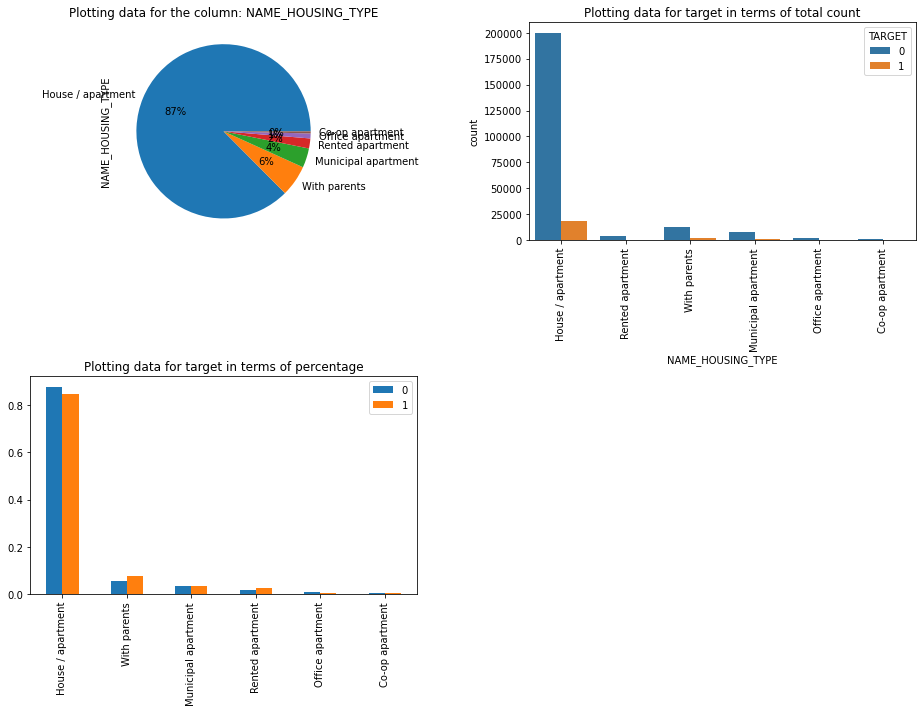

Plotting AMT_ANNUITY_RANGE


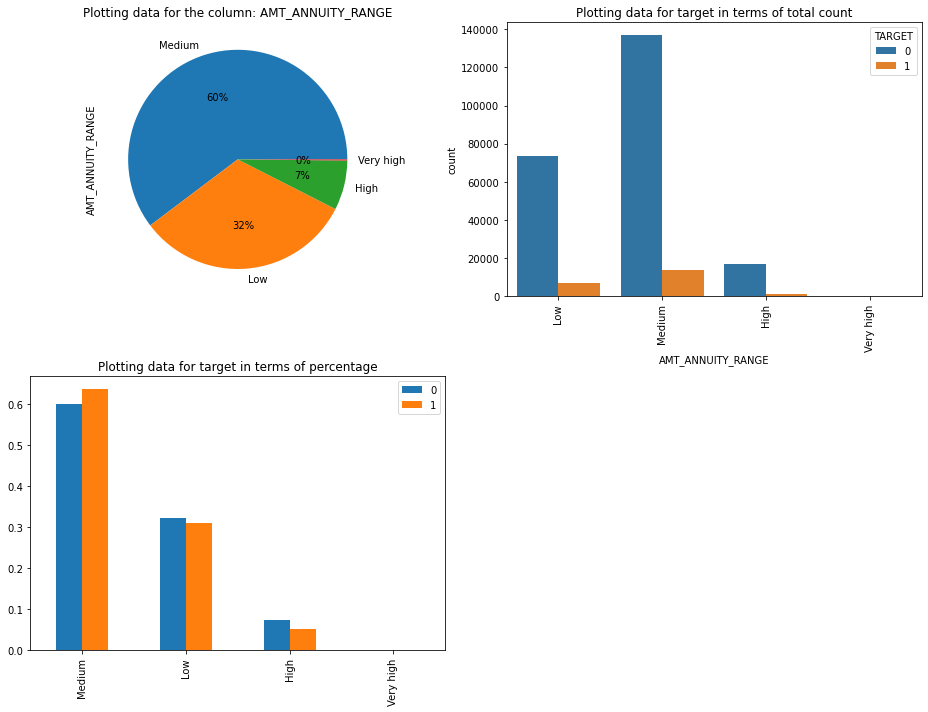

Plotting ORGANIZATION_TYPE


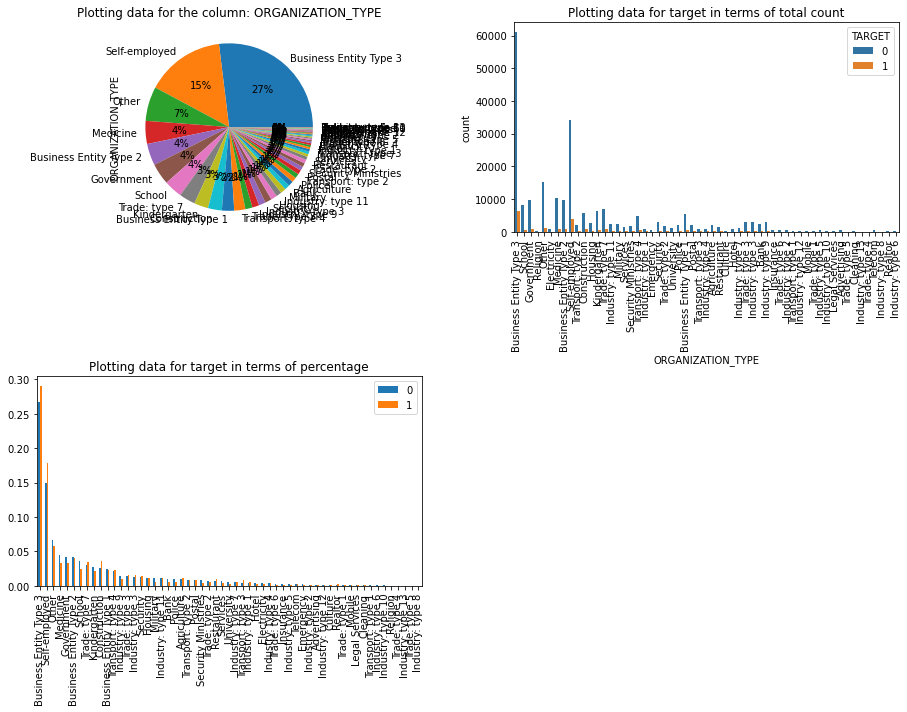

Plotting AMT_INCOME_RANGE


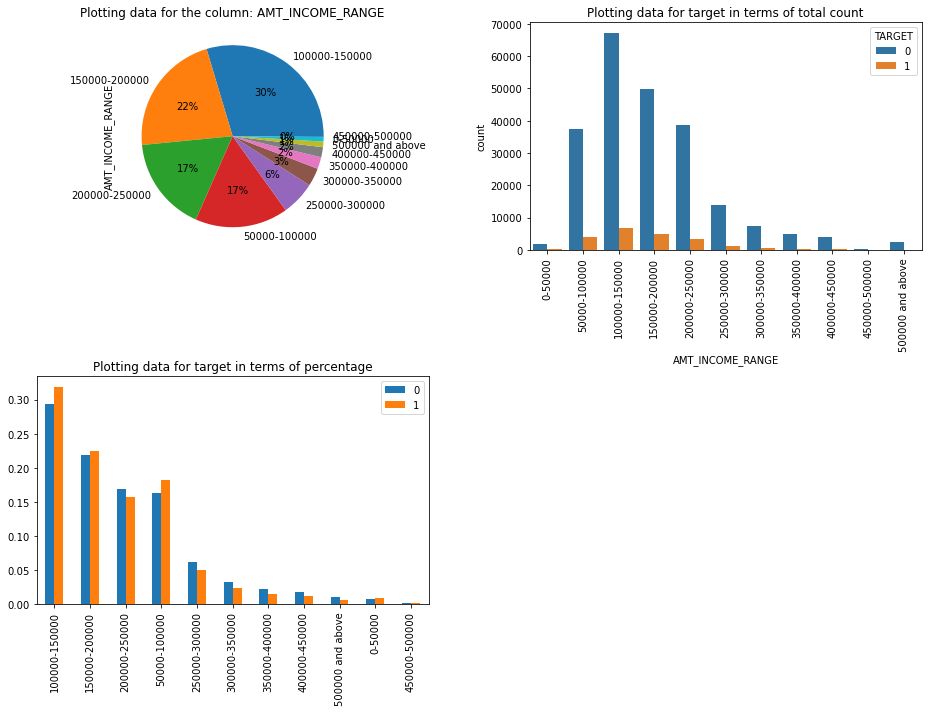

Plotting FLAG_OWN_REALTY


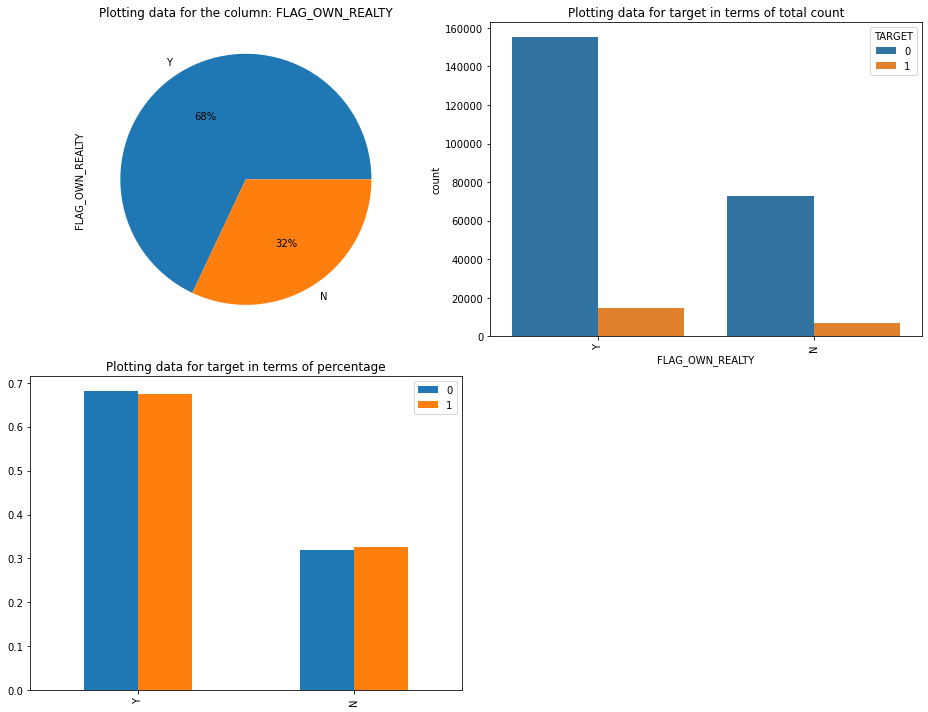

Plotting OCCUPATION_TYPE


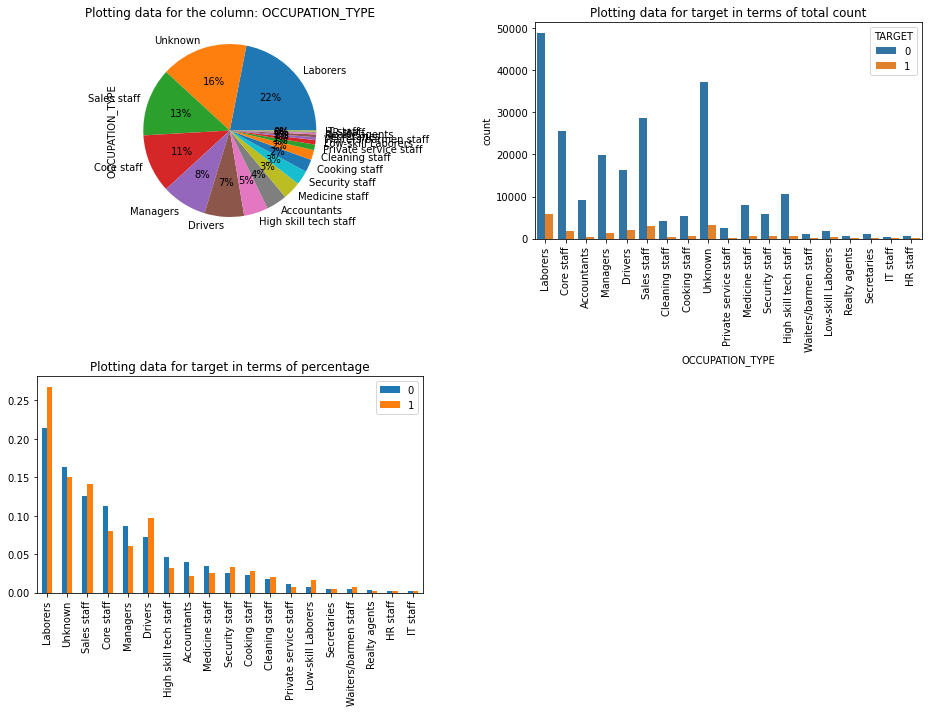

Plotting FLAG_OWN_CAR


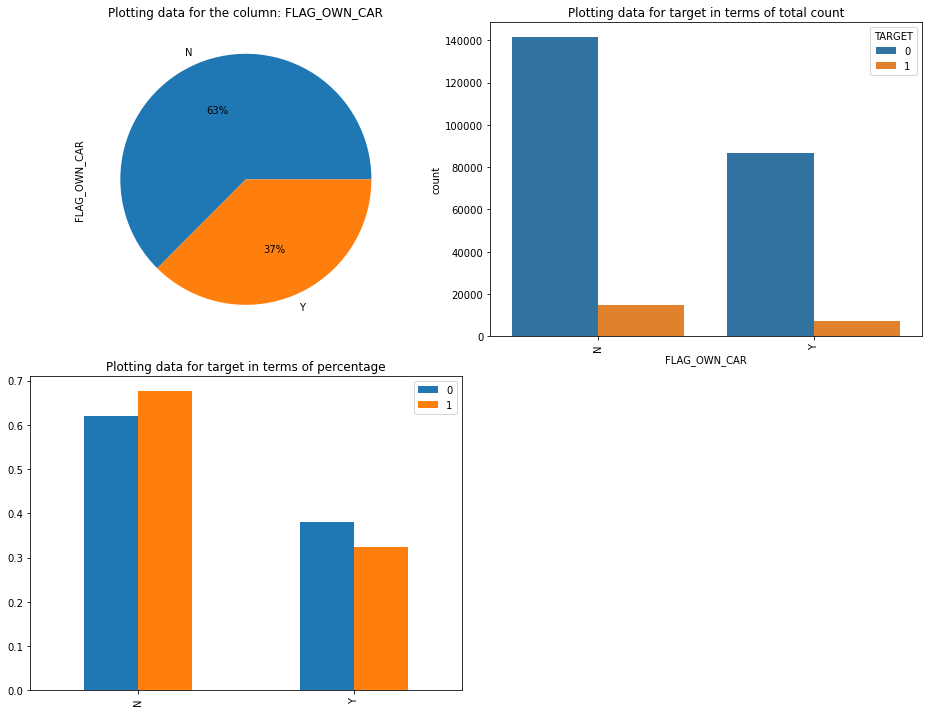

Plotting NAME_CONTRACT_TYPE


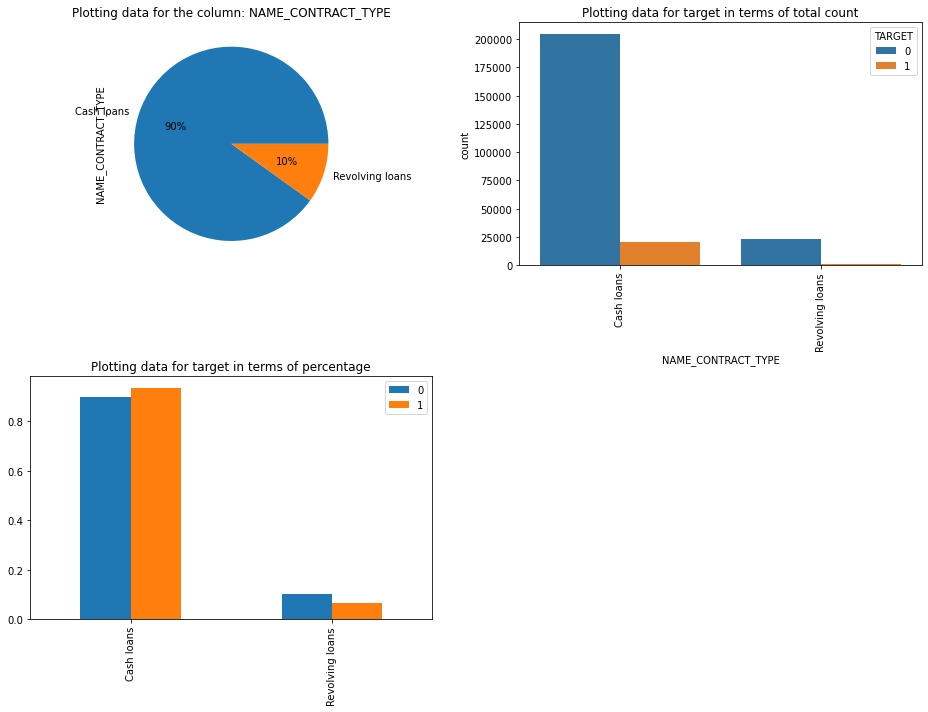

Plotting NAME_TYPE_SUITE


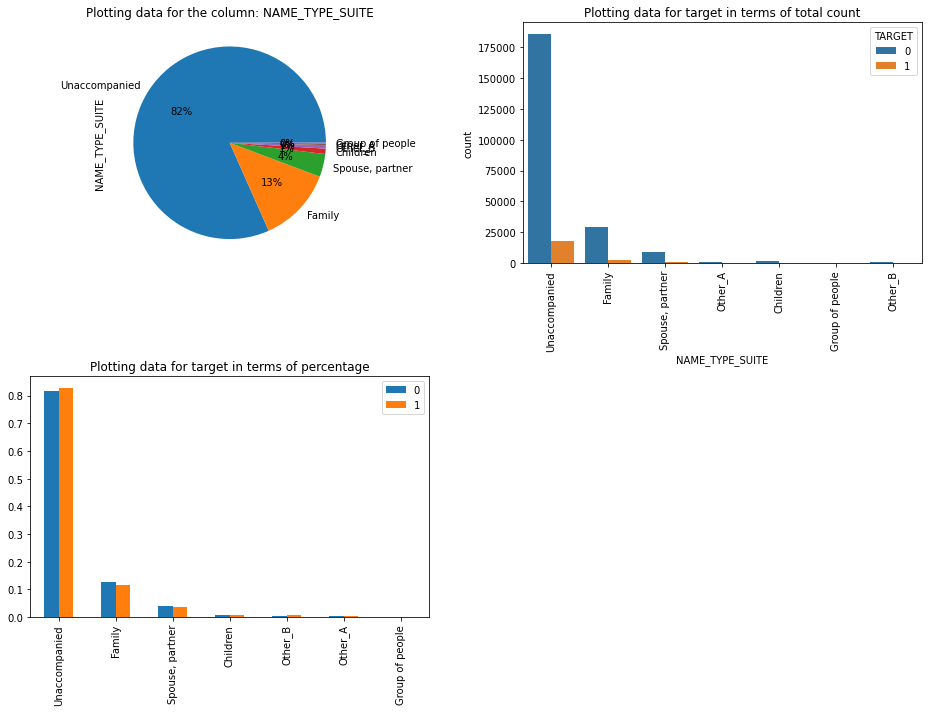

Plotting NAME_EDUCATION_TYPE


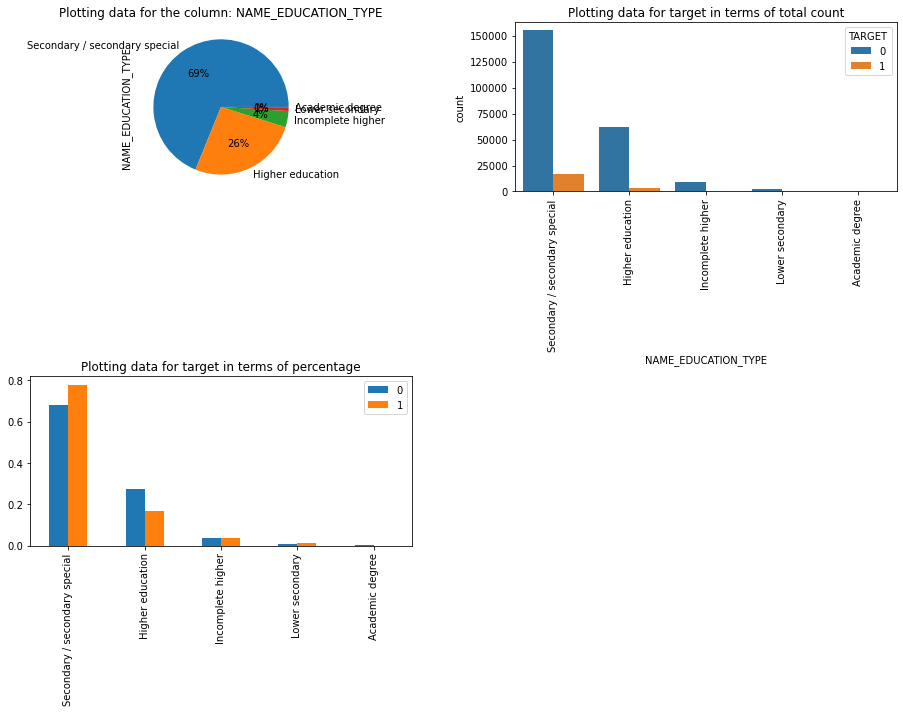

Plotting NAME_INCOME_TYPE


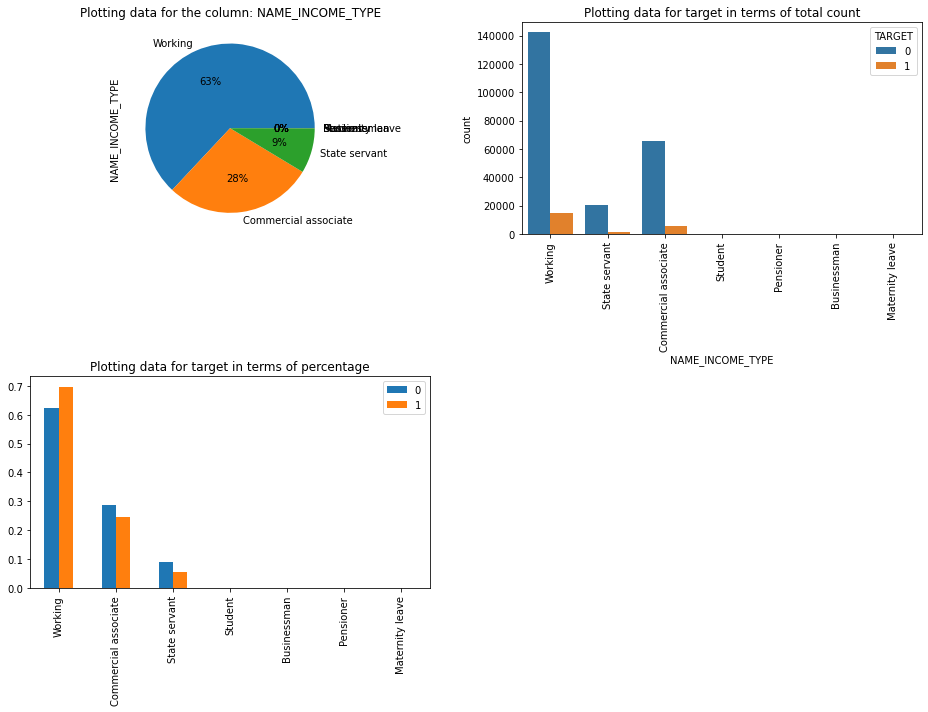

Plotting AMT_CREDIT_RANGE


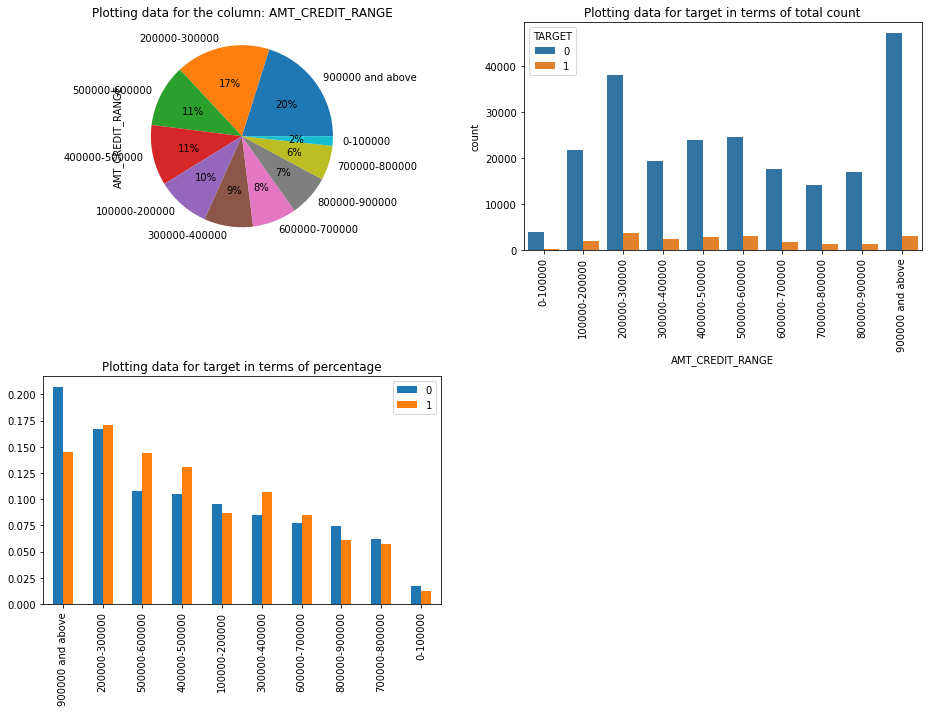

Plotting CODE_GENDER


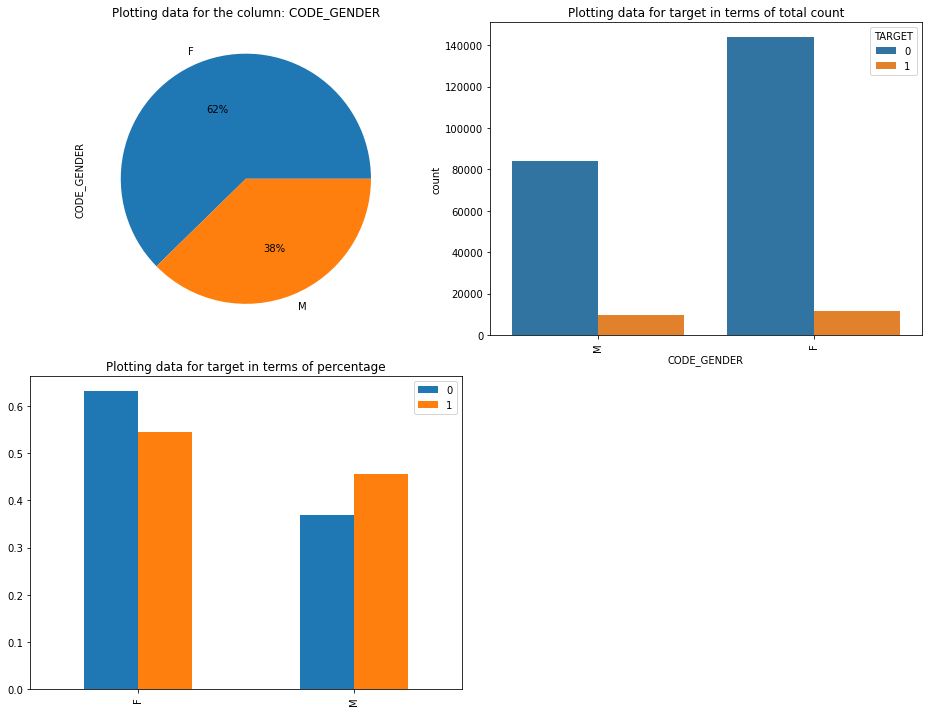

Plotting NAME_FAMILY_STATUS


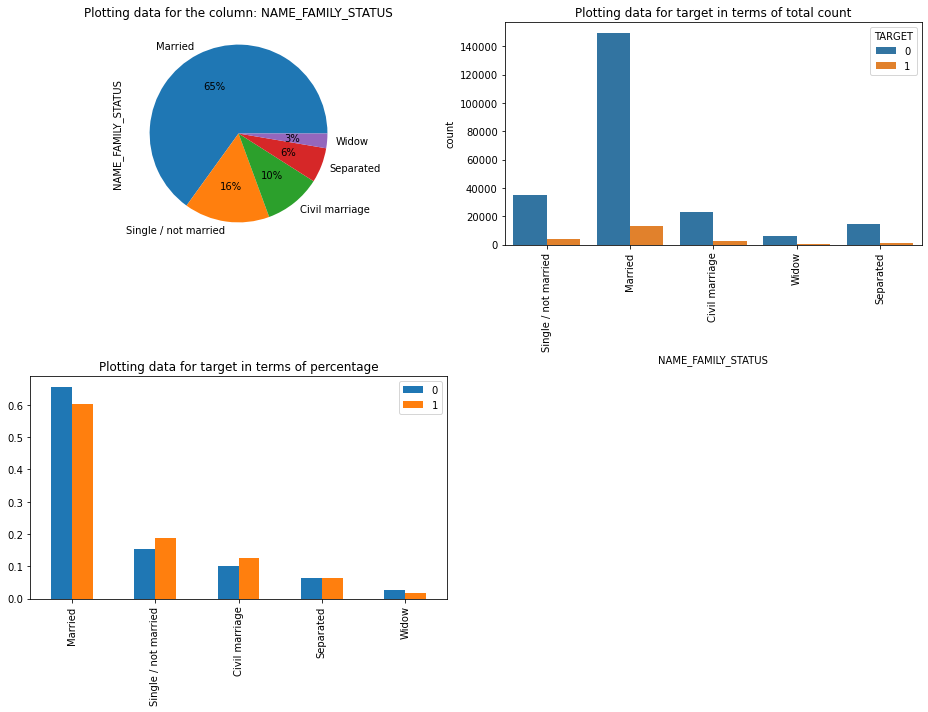

In [73]:
# Creating plots for categorical columns
for column in cat_columns:
    print('Plotting '+column)
    plotting(app_df,target0_df,target1_df,column)
    print('=====================================================================================')

### UNIVARIATE ANALYSIS - Observation on categorical columns:
- Column – ‘NAME_INCOME_TYPE’
 -	Highest loan applications are received from who is having the income type as ‘Working’.
 -	Those who are having income type as working are having high numbers in payment difficulties.
- Column – ‘ORGANIZATION_TYPE’
 -	People who are working in organization type Business Entity Type 3 and Self-employed are highly applying for the loans.
 - Among these two categories, ‘Business Entity Type 3’ are having high numbers in payment difficulties.
- Column – NAME_CONTRACT_TYPE 
 -	Cash loans are highly preferred by the applicants and we have payment difficulty numbers high in this category, which is obvious.
- Column – 'CODE_GENDER'
 -	Females are applying high number of loans but, the default percentage is higher for males.
- Column – NAME_EDUCATION_TYPE
 -	People who are having Secondary/Secondary special education status are applying a higher number of loans and have higher default counts.
- Column – AMT_INCOME_RANGE
 -	People who are having an income range of 50,000 to 2,25,000 are applying for high number of loans and have payment difficulties too.
- Column – NAME_FAMILY_STATUS
 -	Married people applying high number of loans.
- Column – NAME_HOUSING_TYPE
 -	People who own house/apartment are the most applying for loans.
 
 
So, people who are having secondary education, work in business entity type 3, have house/apartment and the salary between 50,000 to 2,25,000 are having the most number of loan applications. Also, have a high percentage of defaulter counts.


## Correlation for non_defaulters

In [74]:
# Creating plots for numerical columns for the target '0'
# finding the correlation between columns and plotting heatmap

In [75]:
corr0 = target0_df[num_columns].corr()
corr0

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000821,0.001486,-0.000650,-0.000983,-0.000383,0.000075,0.000880,-0.000083,-0.000081,-0.000470,-0.001536,-0.003549,-0.001414,0.000895,0.001574,0.000883,0.002329,0.003556,-0.000502,-0.001803,-0.002122,0.000550,0.000340,0.000059,0.003313
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000821,NaN,1.000000,-0.009305,-0.018484,-0.007199,-0.022106,-0.030393,-0.243408,-0.063288,-0.163170,0.117825,0.893379,-0.001527,0.010426,0.018455,-0.026605,-0.013383,0.003538,0.002503,0.001573,-0.000750,0.000605,0.000010,-0.017553,-0.000319,-0.026393
AMT_INCOME_TOTAL,0.001486,NaN,-0.009305,1.000000,0.324838,0.399583,0.331954,0.167256,0.045545,0.030188,-0.034209,0.026365,-0.002872,-0.003614,-0.019286,-0.010331,0.137619,-0.044727,-0.027777,-0.027300,0.035548,0.002593,0.009265,0.009237,0.054738,0.016411,0.031441
AMT_CREDIT,-0.000650,NaN,-0.018484,0.324838,1.000000,0.761133,0.986739,0.104057,0.153538,0.088045,0.015907,0.034390,0.036961,-0.037328,-0.038381,-0.014671,0.136435,0.051723,-0.022137,-0.024156,0.071631,-0.002428,0.005734,-0.000090,0.054045,0.023078,-0.038389
AMT_ANNUITY,-0.000983,NaN,-0.007199,0.399583,0.761133,1.000000,0.766107,0.122240,0.091226,0.052233,-0.009672,0.025525,0.041545,-0.018708,-0.028878,-0.014115,0.127241,0.041316,-0.023279,-0.024082,0.061729,0.004241,0.002901,0.013772,0.032735,0.014183,-0.003876
AMT_GOODS_PRICE,-0.000383,NaN,-0.022106,0.331954,0.986739,0.766107,1.000000,0.107098,0.147938,0.089164,0.012482,0.036252,0.035165,-0.036728,-0.039129,-0.015680,0.142869,0.053766,-0.023431,-0.025054,0.073706,-0.001997,0.006090,0.000441,0.055771,0.023477,-0.040957
REGION_POPULATION_RELATIVE,0.000075,NaN,-0.030393,0.167256,0.104057,0.122240,0.107098,1.000000,0.041684,-0.008458,0.060257,0.003904,-0.028743,-0.053509,-0.048874,-0.016437,0.206984,-0.012179,0.004985,0.000639,0.044668,-0.001207,0.001687,-0.003853,0.074973,-0.001916,-0.002228
DAYS_BIRTH,0.000880,NaN,-0.243408,0.045545,0.153538,0.091226,0.147938,0.041684,1.000000,0.352375,0.299523,0.107200,-0.179178,-0.165400,-0.112540,-0.031126,0.142249,0.154358,-0.015386,-0.015926,0.136860,0.000080,-0.001234,0.003422,0.033648,0.008615,0.059665
DAYS_EMPLOYED,-0.000083,NaN,-0.063288,0.030188,0.088045,0.052233,0.089164,-0.008458,0.352375,1.000000,0.172226,0.086266,-0.031822,-0.111990,-0.125866,-0.074660,0.081905,0.111395,-0.007359,-0.009239,0.135760,0.003183,-0.001041,0.001337,0.029598,0.001967,0.012046


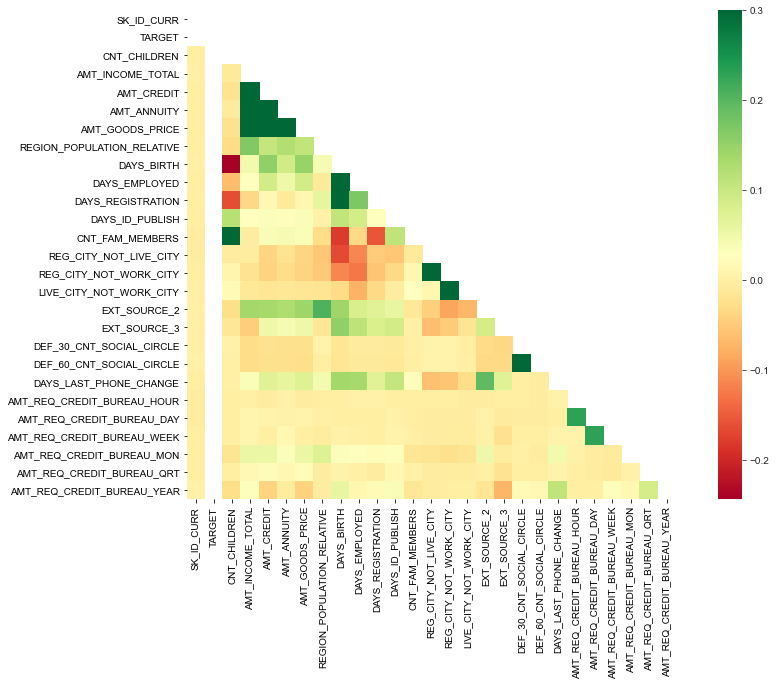

In [76]:
# Mask the upper triangle part of heatmap to not to show the duplicate.
msk = np.zeros_like(corr0)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(15,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr0,mask=msk, vmax=0.3,square=True, cmap="RdYlGn")
    plt.show()

### Observation from the correlation heatmap of target value 0.
- Income of the client is directly proportional to the region's population.
- Client’s Income amount is directly proportional to the goods price and amount annuity.
- Client’s income is directly proportional to the score of external source 2.
- Credit amount, Annuity amount and goods price are highly proportional.
- Client changing his registration is inversely proportional to the count of the family members.
- Client’s permanent address does not match with the contact address is directly proportional with the client's permanent address does not match with the work address.
- Client's social surroundings defaulted on 30 days past due directly proportional to 60 days past due.
- Credit amount is directly proportional to the region's population.


## Finding top 10 correlation

In [77]:
# Using abs() fuction to covert the negative values to positive.
# Using unstack() function to create a dataframe with the correlation data.

corr0_data = corr0.abs().unstack().sort_values(kind='quicksort').dropna()

In [78]:
# Removing the correlations which are having value 1. Because, they are showing the correlation between the same columns.
corr0_data = corr0_data[corr0_data != 1.0]

Top 10 correlation validables for target value 0

In [79]:
# Using tail() fuction we can find the top 10 correlation variables which will have the duplicate rows.
# So, we can get the top 10 correlation variables by skipping one row of result data using slicing operation.

Top10_Target0_corr = corr0_data.tail(20)[::2]
print(Top10_Target0_corr)

AMT_GOODS_PRICE           AMT_INCOME_TOTAL            0.331954
DAYS_EMPLOYED             DAYS_BIRTH                  0.352375
AMT_ANNUITY               AMT_INCOME_TOTAL            0.399583
REG_CITY_NOT_LIVE_CITY    REG_CITY_NOT_WORK_CITY      0.442588
AMT_CREDIT                AMT_ANNUITY                 0.761133
AMT_GOODS_PRICE           AMT_ANNUITY                 0.766107
REG_CITY_NOT_WORK_CITY    LIVE_CITY_NOT_WORK_CITY     0.820925
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.861480
CNT_FAM_MEMBERS           CNT_CHILDREN                0.893379
AMT_CREDIT                AMT_GOODS_PRICE             0.986739
dtype: float64


## Correlation for defaulters

In [80]:
# Doing the same above correlation caluclationa and finding top10 variables for target value 1

In [81]:
corr1 = target1_df.corr()
corr1

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.006499,-0.011093,0.000599,-0.007295,0.000384,0.007350,0.005137,-0.001018,-0.003153,0.003449,-0.004672,0.008393,-0.000869,-0.005001,0.005556,-0.001101,-0.001376,-0.007418,-0.000087,-0.012478,-0.003932,-0.004158,0.002461,-0.003771,0.007896
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.006499,NaN,1.000000,0.001873,-0.001818,0.015469,-0.007612,-0.031767,-0.176425,-0.033242,-0.125949,0.090828,0.893874,-0.018717,-0.001143,0.015686,-0.010514,-0.008154,0.003413,-0.002796,-0.012258,-0.000523,-0.008731,-0.005765,-0.015439,-0.012257,-0.020811
AMT_INCOME_TOTAL,-0.011093,NaN,0.001873,1.000000,0.036226,0.043150,0.035881,0.008565,0.007832,0.000011,0.004030,0.008831,0.003727,-0.003679,-0.006959,-0.004472,0.006235,-0.017079,-0.005854,-0.005266,0.001085,0.000921,-0.000082,0.000888,0.005120,0.000548,0.003281
AMT_CREDIT,0.000599,NaN,-0.001818,0.036226,1.000000,0.747981,0.982759,0.068785,0.190953,0.106534,0.033511,0.062155,0.046059,-0.035268,-0.042245,-0.018883,0.127384,0.056437,-0.031644,-0.034856,0.116908,-0.005402,-0.001050,0.013784,0.061184,-0.003082,-0.021312
AMT_ANNUITY,-0.007295,NaN,0.015469,0.043150,0.747981,1.000000,0.748951,0.074318,0.091236,0.049028,-0.014068,0.043989,0.055168,-0.014053,-0.020209,-0.007337,0.121721,0.040694,-0.024619,-0.027878,0.083497,0.009457,-0.001653,0.035013,0.051069,-0.002976,-0.006543
AMT_GOODS_PRICE,0.000384,NaN,-0.007612,0.035881,0.982759,0.748951,1.000000,0.076167,0.186893,0.112349,0.032530,0.064570,0.042674,-0.035372,-0.042551,-0.018387,0.138018,0.056470,-0.027083,-0.029536,0.124020,-0.004477,0.000718,0.015786,0.064893,-0.002005,-0.024271
REGION_POPULATION_RELATIVE,0.007350,NaN,-0.031767,0.008565,0.068785,0.074318,0.076167,1.000000,0.050585,0.015603,0.055831,0.012725,-0.030541,-0.060157,-0.053842,-0.019182,0.170017,-0.014077,0.024074,0.015679,0.055445,-0.001661,-0.001003,0.007807,0.065973,-0.003005,0.002081
DAYS_BIRTH,0.005137,NaN,-0.176425,0.007832,0.190953,0.091236,0.186893,0.050585,1.000000,0.306837,0.240025,0.134049,-0.110404,-0.142487,-0.096850,-0.012639,0.142781,0.108392,-0.010973,-0.012326,0.147188,-0.009113,-0.000317,0.002082,0.032845,0.019870,0.086041
DAYS_EMPLOYED,-0.001018,NaN,-0.033242,0.000011,0.106534,0.049028,0.112349,0.015603,0.306837,1.000000,0.136922,0.095493,0.001114,-0.113529,-0.135006,-0.071416,0.093765,0.054670,-0.000292,-0.000685,0.169128,-0.007361,0.007539,0.012473,0.028877,-0.008141,0.034439


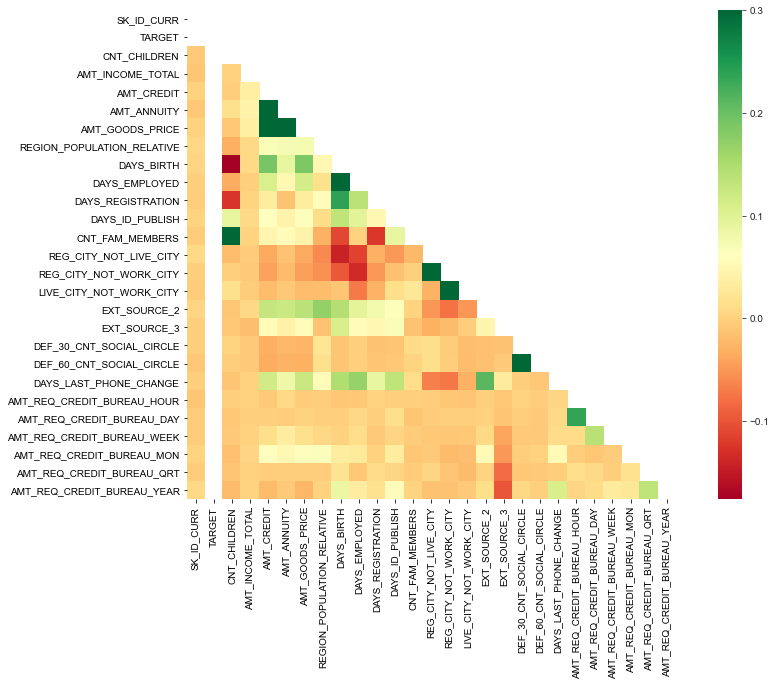

In [82]:
msk = np.zeros_like(corr1)
msk[np.triu_indices_from(msk)] = True
f, ax = plt.subplots(figsize=(15,9))
with sns.axes_style("white"):
    ax = sns.heatmap(corr1,mask=msk, vmax=0.3,square=True, cmap="RdYlGn")
    plt.show()

### Observation from the correlation heatmap of the target value 1.

- The amount credited is directly proportional to the good price and amount annuity.
- The client’s permanent address does not match the contact address is directly proportional to the client's permanent address does not match the work address.
- The client's social surroundings defaulted on 30 days past due directly proportional to 60 days past due.
- Count of children inversely proportional to days birth and days registration.


In [83]:
# unstacking correlation data
corr1_data = corr1.abs().unstack().sort_values(kind='quicksort').dropna()

In [84]:
corr1_data = corr1_data[corr1_data != 1.0]

Top 10 correlation validables for the target value 1

In [85]:
# Top10 correlation variable for target value 1
Top10_Target1_corr = corr1_data.tail(20)[1::2]
Top10_Target1_corr

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY    0.236390
DAYS_REGISTRATION           DAYS_BIRTH                   0.240025
DAYS_EMPLOYED               DAYS_BIRTH                   0.306837
REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY       0.478805
AMT_CREDIT                  AMT_ANNUITY                  0.747981
AMT_GOODS_PRICE             AMT_ANNUITY                  0.748951
LIVE_CITY_NOT_WORK_CITY     REG_CITY_NOT_WORK_CITY       0.767803
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE     0.868951
CNT_FAM_MEMBERS             CNT_CHILDREN                 0.893874
AMT_CREDIT                  AMT_GOODS_PRICE              0.982759
dtype: float64

## Segmented univariate analysis

In [86]:
# Creating plotting function 

def plotting_seg(col1, col2):
    plt.figure(figsize=(15,8))

    plt.subplot(1,2,1)
    sns.barplot(x=col1,y=col2,data=target0_df)
    plt.xticks(rotation=90)
    plt.title('Non-defaulters')

    plt.subplot(1,2,2)
    sns.barplot(x=col1,y=col2,data=target1_df)
    plt.xticks(rotation=90)
    plt.title('Defaulters')

    plt.show()

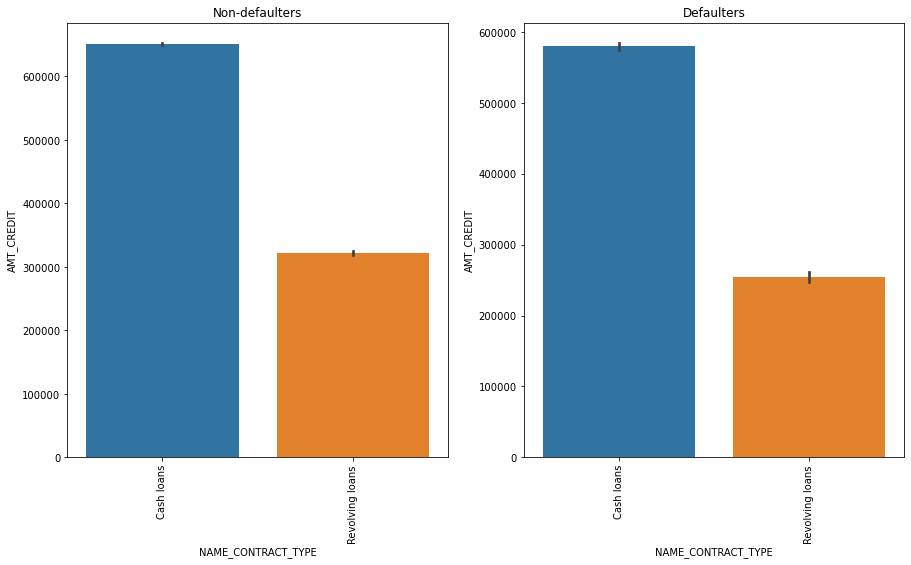

In [87]:
plotting_seg('NAME_CONTRACT_TYPE','AMT_CREDIT')

### Observation
- The clients in both categories prefer cash loans to revolving loans.

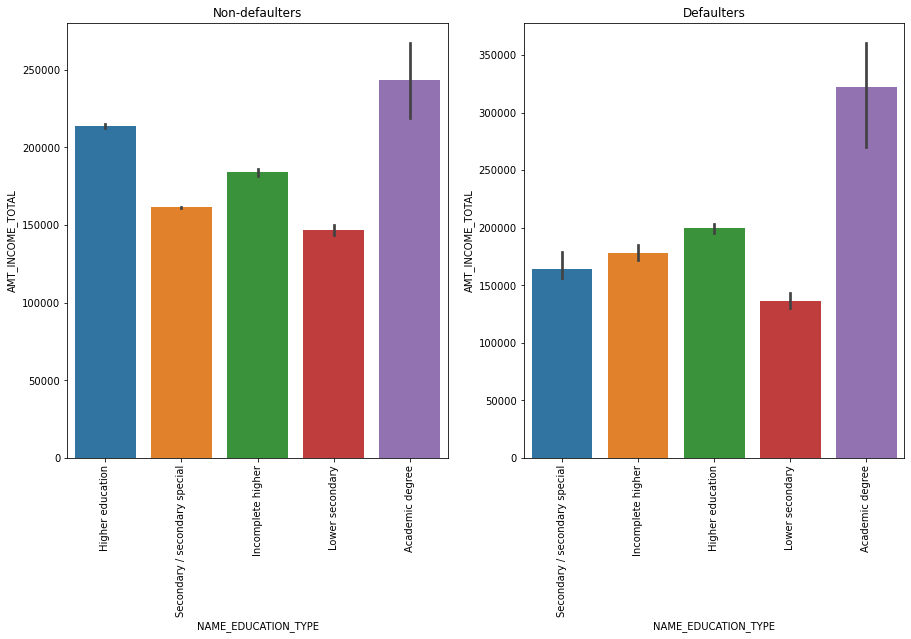

In [88]:
plotting_seg('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL')

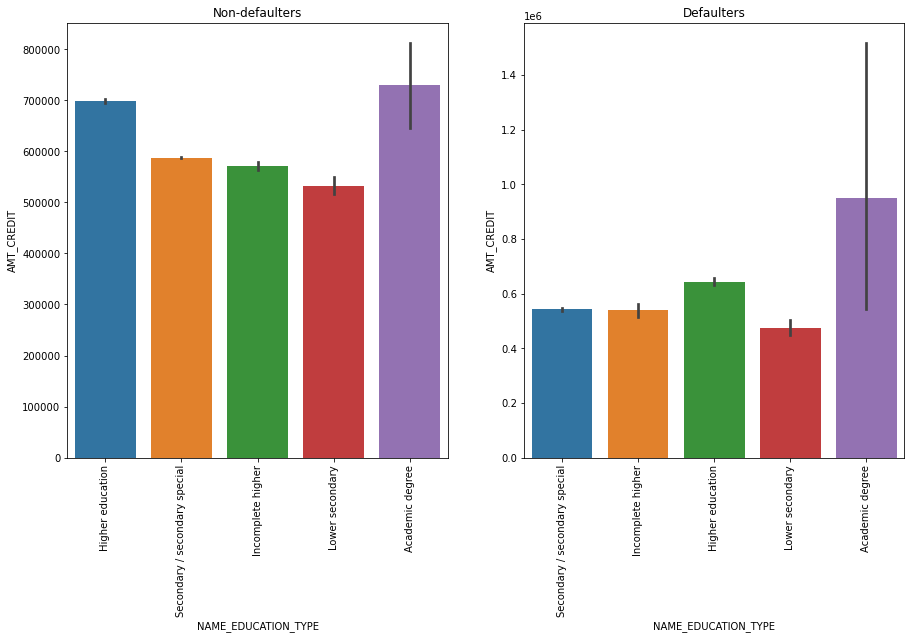

In [89]:
plotting_seg('NAME_EDUCATION_TYPE','AMT_CREDIT')

### Observation
- Clients who are having an academic degree or higher education get higher income and the loan value is high. Also, clients who have an academic degree are having high defaulted value.

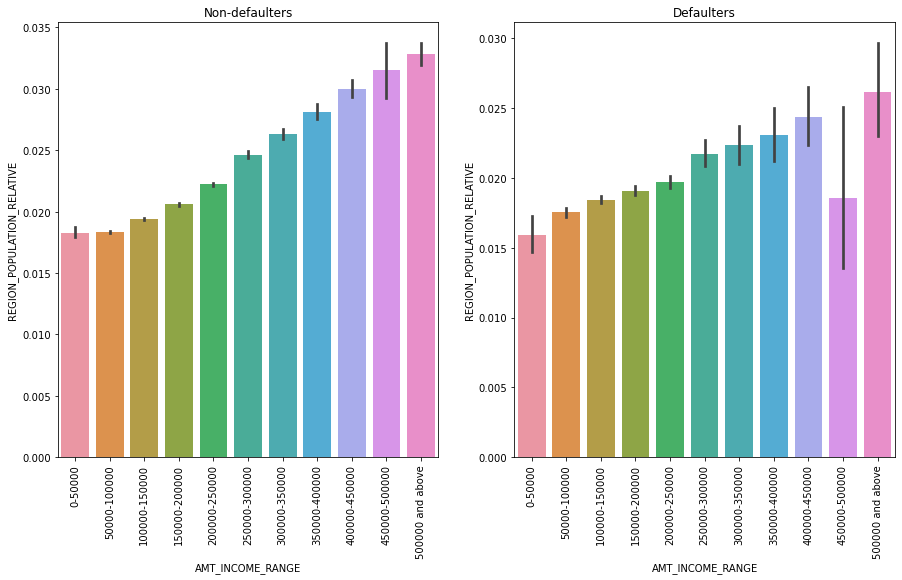

In [90]:
plotting_seg('AMT_INCOME_RANGE','REGION_POPULATION_RELATIVE')

- The clients who have high incomes are living in highly populated regions.

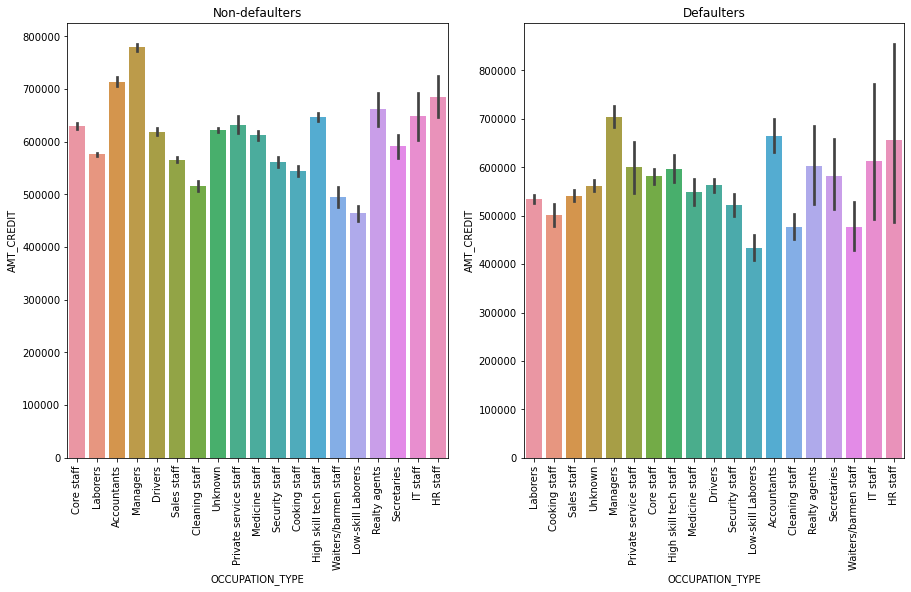

In [91]:
plotting_seg('OCCUPATION_TYPE','AMT_CREDIT')

- Managers, Accountants and HR staff are having high credit amounts.

## Analysing for outliers

Plotting the numerical data columns against the index and analysing for the outliers.

In [92]:
numerical_cols = app_df.select_dtypes(include=['int','float']).columns

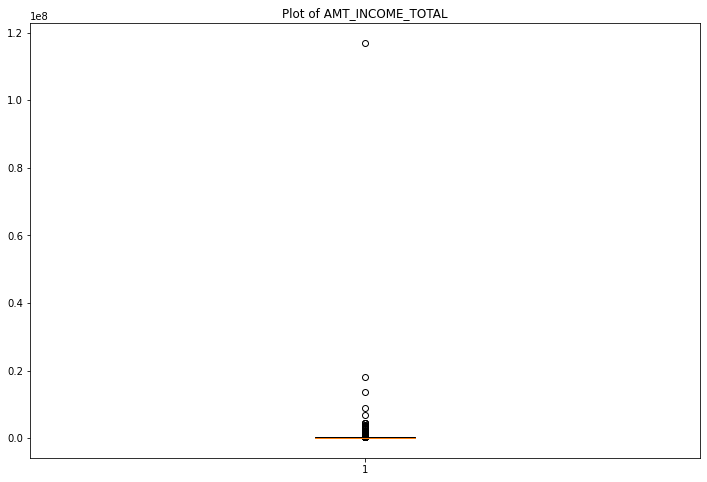

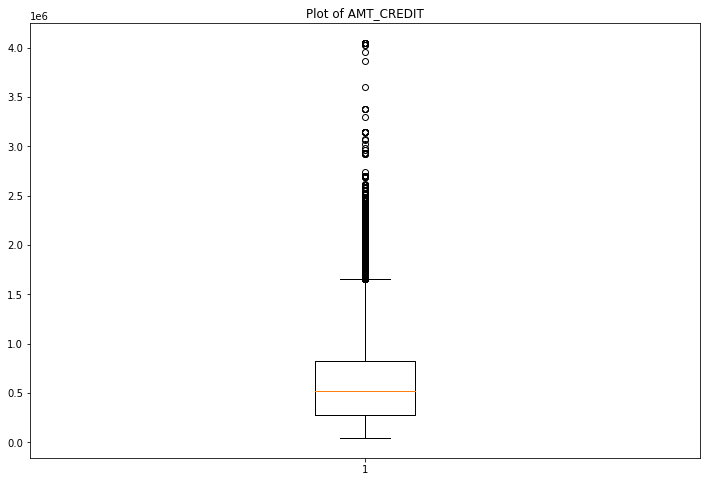

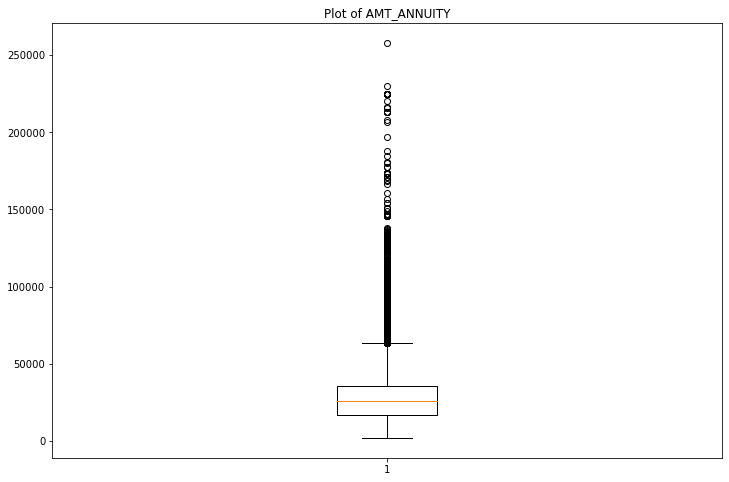

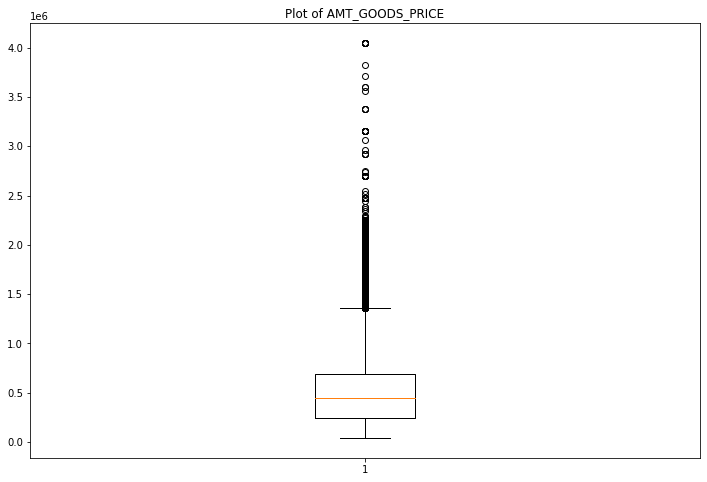

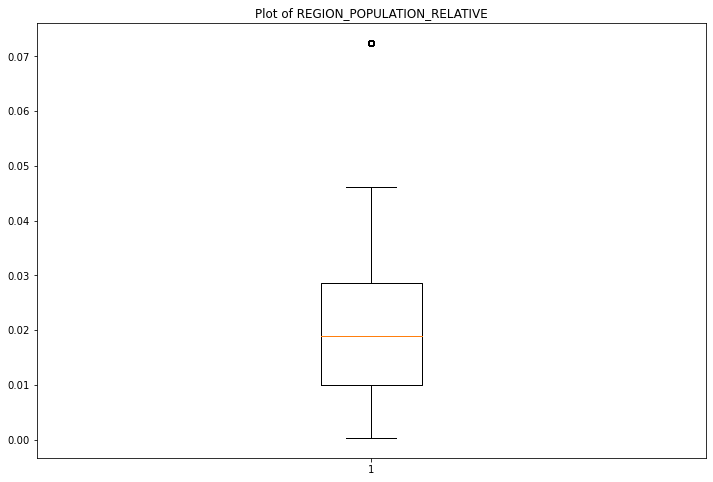

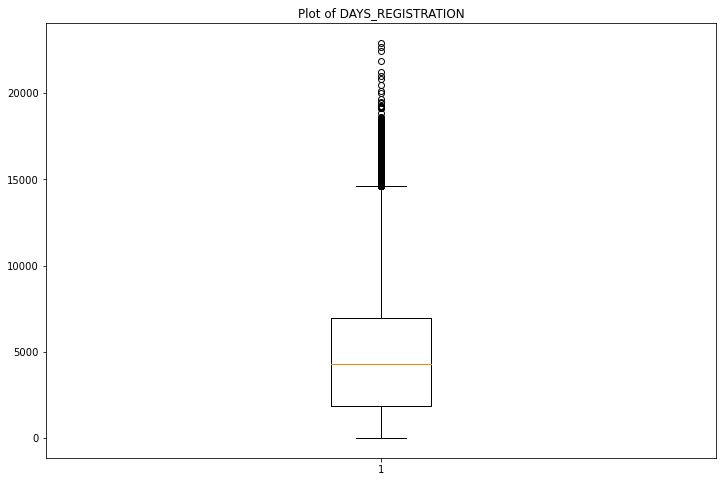

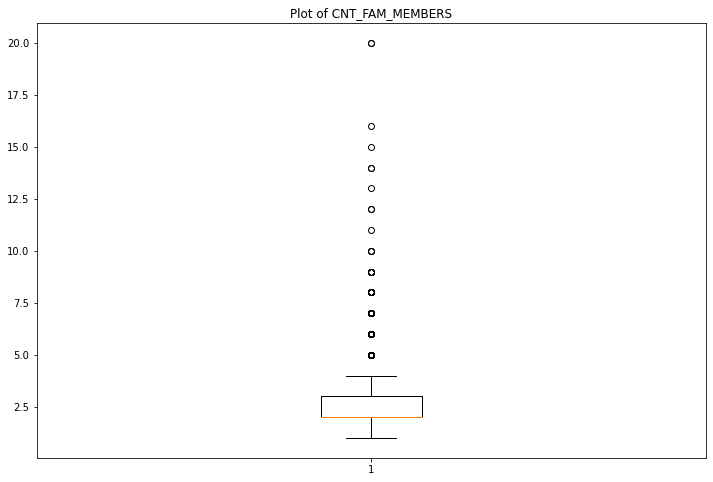

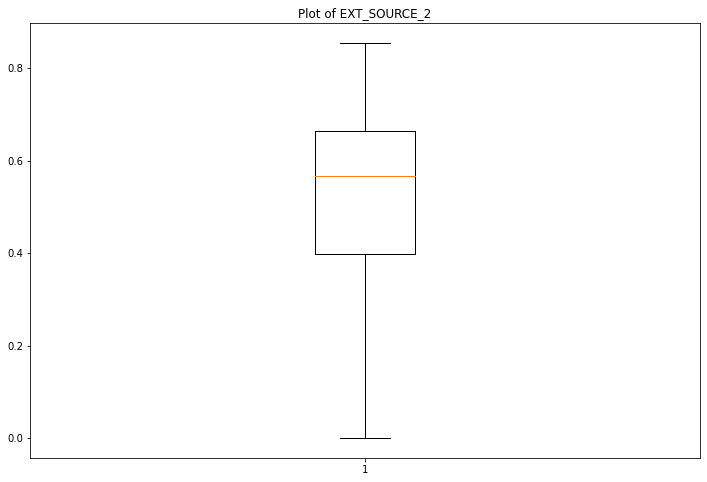

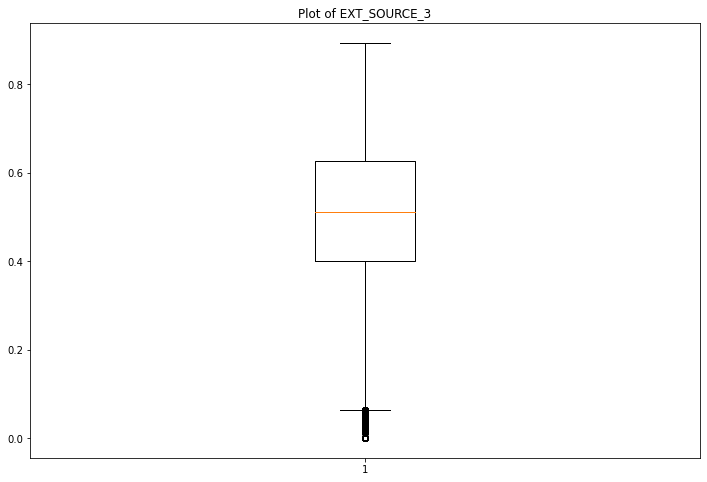

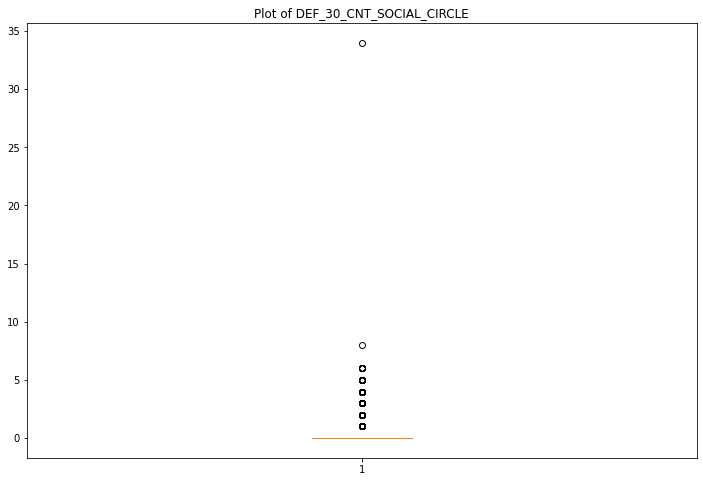

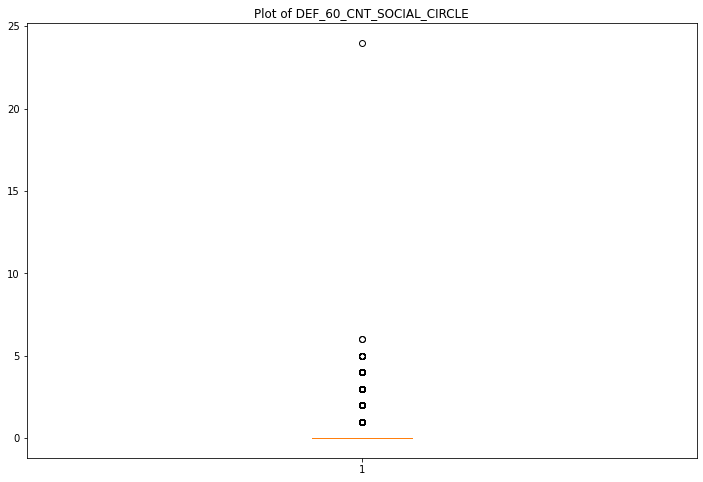

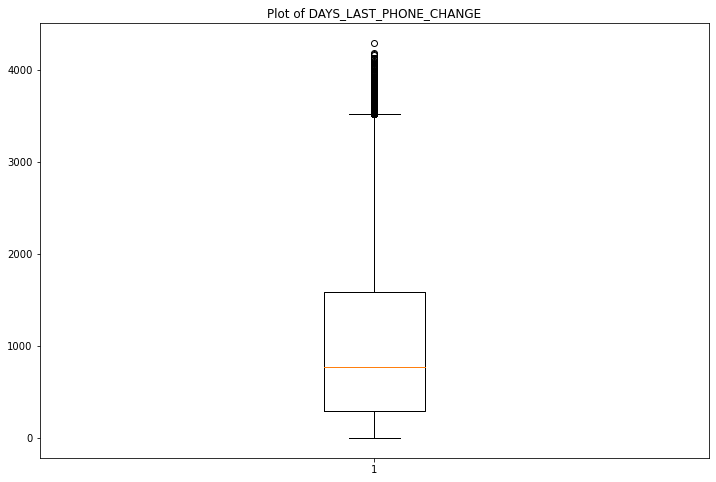

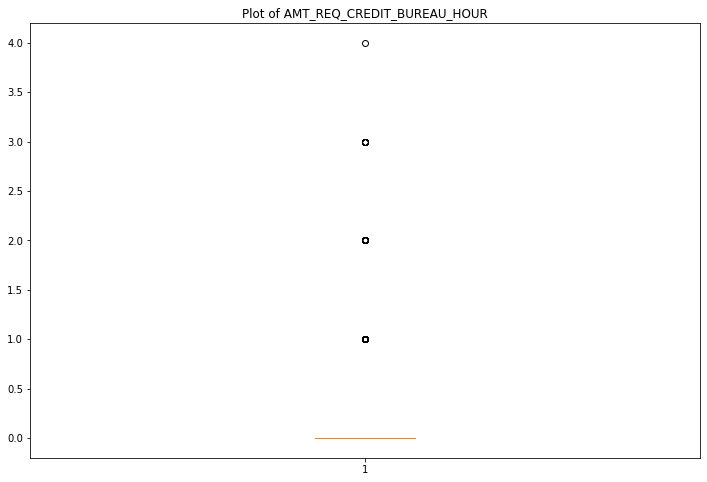

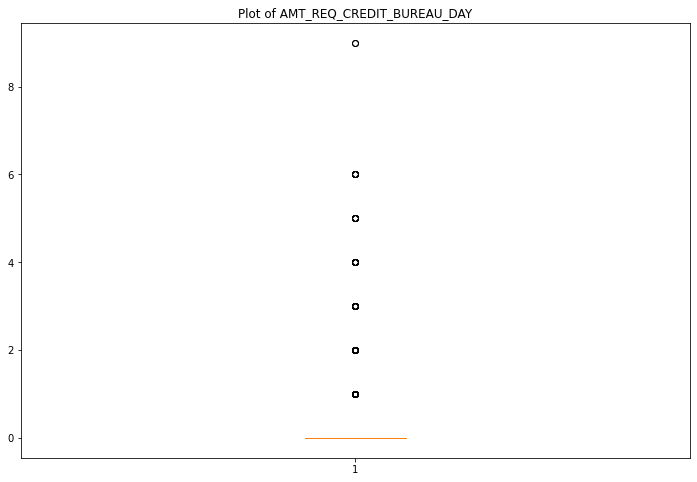

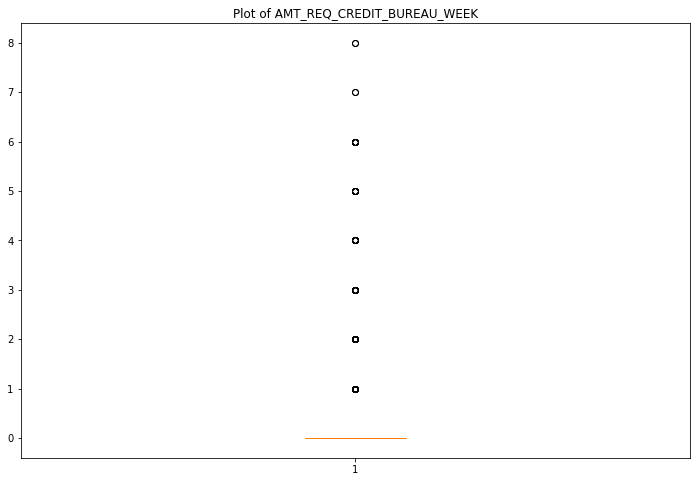

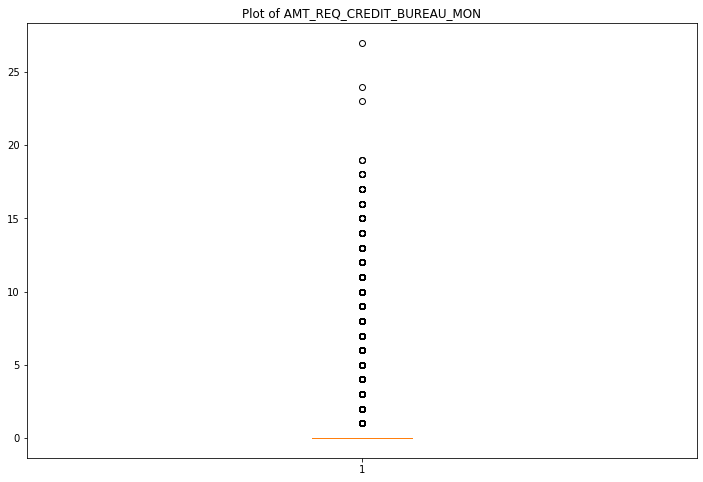

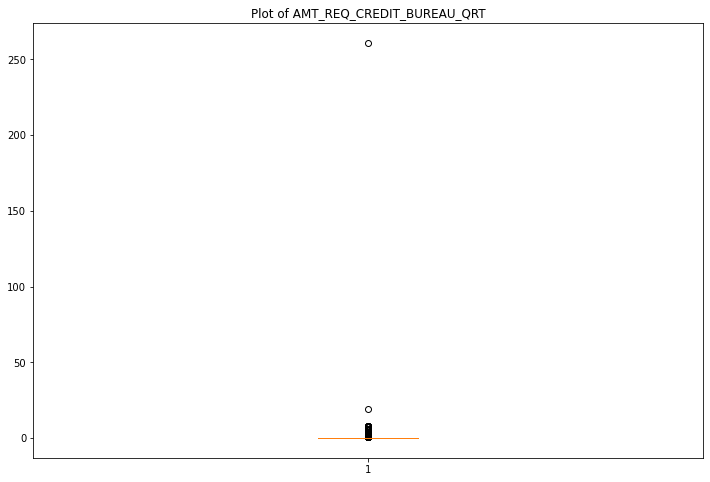

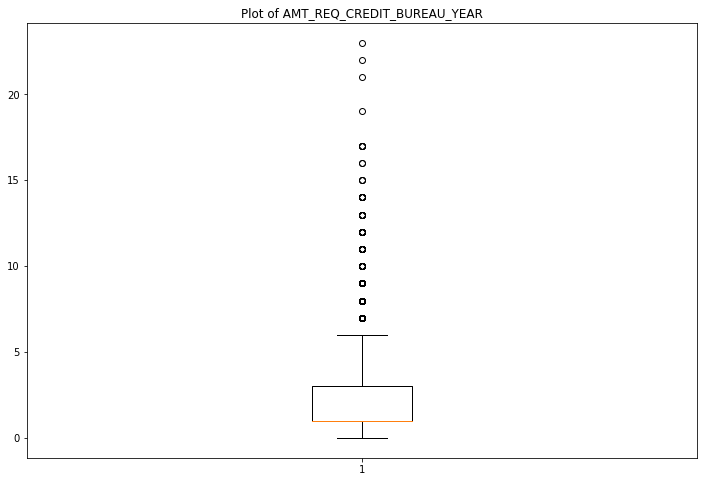

In [93]:
#Plotting box plots for numerical columns.
for col in numerical_cols:
    title = 'Plot of '+col
    plt.figure(figsize=(12,8))
    plt.boxplot(app_df[col])
    plt.title(title)
    plt.show()
    print('\n===========================================================\n')

### Observations
- AMT_INCOME_TOTAL
    - Total income has an outlier which is having a value of nearly 12,00,00,000.
    - Some outliers are having values in the range between 1 Crore to 2 Crore.
- AMT_CREDIT
    - There are many outliers present in this column in the range between 20,00,000 to 40,00,000.
    - First quartile is smaller than the fourth quartile.
- AMT_ANNUITY
    - This column also have some outliers.
    - First quartile is smaller than the fourth quartile.
- AMT_GOOD_PRICE
    - This column has outliers between the range between 15,00,000 to 40,00,000.
    - First quartile is smaller than the fourth quartile.
- REGION_POPULATION_RELATIVE
    - This columns is only having one outlier with a value of around 0.07.
    - Chart showing that the data value is almost equally spread.
- CNT_FAM_MEMBERS
     - Most of the family is having the total count below 4.
     - Highest family count in the data is 20 people. Which is rare.
     - Very few families have a total count more than 5 people.


## Importing 'previous_application.csv' file

In [94]:
# Reading the 'previous_application.csv' file and storing the dataset in the name 'prev_df'

prev_df = pd.read_csv('previous_application.csv')

In [95]:
prev_df.shape

(1670214, 37)

In [96]:
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [97]:
prev_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [98]:
len(prev_df)

1670214

# 1. Treating missing values and analysing data quality

In [99]:
# Finding null values percentage for each column.

prev_null_perc = (prev_df.isnull().sum()/len(prev_df))*100
prev_null_perc[prev_null_perc>0]

AMT_ANNUITY                  22.286665
AMT_CREDIT                    0.000060
AMT_DOWN_PAYMENT             53.636480
AMT_GOODS_PRICE              23.081773
RATE_DOWN_PAYMENT            53.636480
RATE_INTEREST_PRIMARY        99.643698
RATE_INTEREST_PRIVILEGED     99.643698
NAME_TYPE_SUITE              49.119754
CNT_PAYMENT                  22.286366
PRODUCT_COMBINATION           0.020716
DAYS_FIRST_DRAWING           40.298129
DAYS_FIRST_DUE               40.298129
DAYS_LAST_DUE_1ST_VERSION    40.298129
DAYS_LAST_DUE                40.298129
DAYS_TERMINATION             40.298129
NFLAG_INSURED_ON_APPROVAL    40.298129
dtype: float64

### Observation
- Removing the columns which are having missing values greater than 40% in a column.

In [100]:
prev_df.drop(prev_null_perc[prev_null_perc>40].index,axis=1,inplace=True)

In [101]:
prev_df.shape

(1670214, 26)

In [102]:
# Checking the balance null values in each columns
prev_null_perc = (prev_df.isnull().sum()/len(prev_df))*100
prev_null_perc[prev_null_perc>0]

AMT_ANNUITY            22.286665
AMT_CREDIT              0.000060
AMT_GOODS_PRICE        23.081773
CNT_PAYMENT            22.286366
PRODUCT_COMBINATION     0.020716
dtype: float64

### Observations
- In the columns 'AMT_CREDIT' and 'PRODUCT_COMBINATION' null values are less than 1%.
- So, we can remove these rows from the dataset.

In [103]:
rows_to_del= prev_df[prev_df[prev_null_perc[np.logical_and(prev_null_perc>0,prev_null_perc<=1,)].index].isnull().sum(axis=1)>0].index

In [104]:
prev_df.drop(rows_to_del,axis=0,inplace=True)

In [105]:
# Checking the balance null values in each column
prev_null_perc = (prev_df.isnull().sum()/len(prev_df))*100
prev_null_perc[prev_null_perc>0]

AMT_ANNUITY        22.270576
AMT_GOODS_PRICE    23.065789
CNT_PAYMENT        22.270277
dtype: float64

### Observations

- The balance columns are having missing values of around 22% and they are denoting amount and term details.
- So, we can remove the missing columns to perform the analysis without any biasing.

In [106]:
rows_to_del = prev_df[prev_df[prev_null_perc[prev_null_perc>0].index].isnull().sum(axis=1)>0].index

In [107]:
prev_df.drop(rows_to_del,axis=0,inplace=True)

In [108]:
# Checking the balance null values in each column
prev_null_perc = (prev_df.isnull().sum()/len(prev_df))*100
prev_null_perc[prev_null_perc>0]

Series([], dtype: float64)

- Now, need to find whether the dataset filled with the string 'NA' in the non-numeric columns

In [109]:
# Separating non-numeric columns to validate
non_numeric_columns= list(set(prev_df.columns) - set(prev_df.describe().columns))
non_numeric_columns

['NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CHANNEL_TYPE',
 'NAME_PORTFOLIO',
 'PRODUCT_COMBINATION',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'NAME_GOODS_CATEGORY',
 'NAME_CONTRACT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'NAME_PRODUCT_TYPE']

In [110]:
for x in non_numeric_columns:
    print(prev_df[x].value_counts())

Approved        993938
Refused         240969
Canceled         10503
Unused offer       910
Name: NAME_CONTRACT_STATUS, dtype: int64
Cash through the bank                        996935
XNA                                          240190
Non-cash from your account                     8125
Cashless from the account of the employer      1070
Name: NAME_PAYMENT_TYPE, dtype: int64
Country-wide                  447805
Credit and cash offices       396237
Stone                         207693
Regional / Local              105976
AP+ (Cash loan)                47462
Contact center                 34692
Channel of corporate sales      6003
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64
POS      691007
Cash     461563
Cards     93325
Cars        425
Name: NAME_PORTFOLIO, dtype: int64
POS household with interest       257857
POS mobile with interest          190519
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
POS industry with interest   

### Observations
- 'XNA' string available in the columns 'NAME_YIELD_GROUP', 'NAME_PAYMENT_TYPE', 'NAME_PRODUCT_TYPE', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY' and 'CODE_REJECT_REASON'.


- 'XPA' string available in the columns 'NAME_CASH_LOAN_PURPOSE' and 'CODE_REJECT_REASON'


- The columns 'NAME_CASH_LOAN_PURPOSE' is important to conduct the analysis. So, we can remove the rows for the values 'XNA' and 'XAP'

In [111]:
rows_to_del = prev_df[np.logical_or(prev_df['NAME_CASH_LOAN_PURPOSE']=='XNA',prev_df['NAME_CASH_LOAN_PURPOSE']=='XAP')].index

In [112]:
prev_df.drop(rows_to_del,axis=0,inplace=True)

In [113]:
for x in non_numeric_columns:
    print(prev_df[x].value_counts())

Refused     40810
Approved    26929
Canceled     1633
Name: NAME_CONTRACT_STATUS, dtype: int64
Cash through the bank                        63580
XNA                                           5409
Non-cash from your account                     319
Cashless from the account of the employer       64
Name: NAME_PAYMENT_TYPE, dtype: int64
Credit and cash offices       49886
AP+ (Cash loan)                8124
Country-wide                   5259
Channel of corporate sales     3134
Contact center                 2747
Stone                           120
Regional / Local                102
Name: CHANNEL_TYPE, dtype: int64
Cash    69372
Name: NAME_PORTFOLIO, dtype: int64
Cash Street: high      28252
Cash Street: low       22324
Cash Street: middle    17616
Cash X-Sell: middle      522
Cash X-Sell: low         462
Cash X-Sell: high        196
Name: PRODUCT_COMBINATION, dtype: int64
XAP       28562
HC        22210
LIMIT      9168
SCO        5165
VERIF      2340
SCOFR      1413
XNA         512
SYS

- Remove the columns 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE' ,'NAME_SELLER_INDUSTRY' where XNA and XAP counts are still high.

In [114]:
prev_df.drop(prev_df[['CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY', 'NAME_PAYMENT_TYPE' ,'NAME_SELLER_INDUSTRY']],axis=1,inplace=True)

- Removing the 53 rows which are having 'XNA' in the column 'NAME_CLIENT_TYPE' 

In [115]:
prev_df.drop(prev_df[prev_df['NAME_CLIENT_TYPE']=='XNA'].index,axis=0,inplace=True)

In [116]:
prev_df.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Repeater,Cash,walk-in,Credit and cash offices,-1,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Repeater,Cash,x-sell,Credit and cash offices,-1,18.0,low_normal,Cash X-Sell: low
19,1173070,199178,Cash loans,4666.500,45000.0,49455.0,45000.0,SATURDAY,16,Y,1,Everyday expenses,Refused,-584,Repeater,Cash,walk-in,AP+ (Cash loan),6,18.0,high,Cash Street: high
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,67500.0,SATURDAY,10,Y,1,Car repairs,Approved,-766,New,Cash,walk-in,Credit and cash offices,-1,12.0,high,Cash Street: high
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,225000.0,WEDNESDAY,11,Y,1,Building a house or an annex,Refused,-13,Repeater,Cash,walk-in,Credit and cash offices,-1,36.0,low_normal,Cash Street: low
172,1382147,336630,Cash loans,10061.910,112500.0,127350.0,112500.0,MONDAY,13,Y,1,Other,Approved,-631,Repeater,Cash,walk-in,AP+ (Cash loan),4,24.0,high,Cash Street: high
222,1876485,354388,Cash loans,40565.790,976500.0,1061572.5,976500.0,FRIDAY,12,Y,1,Repairs,Refused,-210,Repeater,Cash,walk-in,Credit and cash offices,-1,36.0,low_normal,Cash Street: low
273,1168330,133439,Cash loans,16099.065,180000.0,203760.0,180000.0,WEDNESDAY,11,Y,1,Other,Refused,-553,Repeater,Cash,walk-in,Country-wide,30,24.0,high,Cash Street: high
312,2793811,139978,Cash loans,11330.280,229500.0,302206.5,229500.0,THURSDAY,8,Y,1,Repairs,Refused,-33,Repeater,Cash,walk-in,Credit and cash offices,-1,36.0,low_action,Cash Street: low
313,2036767,159610,Cash loans,14585.895,135000.0,182956.5,135000.0,SATURDAY,10,Y,1,Repairs,Refused,-492,Repeater,Cash,walk-in,Credit and cash offices,-1,24.0,high,Cash Street: high


### Observations
- Negative values present in the columns 'DAYS_DECISION' and 'SELLERPLACE_AREA'
- Checking each column to treat the negative values

In [117]:
prev_df['SELLERPLACE_AREA'].value_counts()

-1      51103
 0       4858
 4       1803
 5       1288
 6        805
        ...  
 356        1
 163        1
 226        1
 672        1
 767        1
Name: SELLERPLACE_AREA, Length: 223, dtype: int64

In [118]:
prev_df[prev_df['SELLERPLACE_AREA']==-1].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Repeater,Cash,walk-in,Credit and cash offices,-1,24.0,high,Cash Street: high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Repeater,Cash,x-sell,Credit and cash offices,-1,18.0,low_normal,Cash X-Sell: low
51,2664403,163660,Cash loans,9804.285,67500.0,82611.0,67500.0,SATURDAY,10,Y,1,Car repairs,Approved,-766,New,Cash,walk-in,Credit and cash offices,-1,12.0,high,Cash Street: high
85,1981960,306707,Cash loans,10678.005,225000.0,269550.0,225000.0,WEDNESDAY,11,Y,1,Building a house or an annex,Refused,-13,Repeater,Cash,walk-in,Credit and cash offices,-1,36.0,low_normal,Cash Street: low
222,1876485,354388,Cash loans,40565.790,976500.0,1061572.5,976500.0,FRIDAY,12,Y,1,Repairs,Refused,-210,Repeater,Cash,walk-in,Credit and cash offices,-1,36.0,low_normal,Cash Street: low


In [119]:
prev_df['DAYS_DECISION'].value_counts()

-336     130
-217     128
-630     123
-602     122
-452     121
        ... 
-1347      1
-963       1
-2377      1
-1202      1
-1368      1
Name: DAYS_DECISION, Length: 2094, dtype: int64

### Observations
- In the column 'SELLERPLACE_AREA' we only have '-1' as negative data. This might be mentioned to denote no selling area mentioned in the previous application. So, we can leave this column as it is.

-  In the column 'DAYS_DECISION', all values are negative and we are using abs() function to change them into positive values.

In [120]:
prev_df['DAYS_DECISION']= prev_df['DAYS_DECISION'].abs()

## Merging two data frames to get insights with the previous application details.

In [121]:
# Naming new data frame as 'merged_df' 
# Using inner join method and using column 'SK_ID_CURR' as common column to merge the data.

merged_df = pd.merge(left=app_df,right=prev_df,how='inner',on='SK_ID_CURR')


In [122]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_RANGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Laborers,1.0,0,0,0,Business Entity Type 3,0.502779,0.510764,0.0,0.0,599.0,0.0,0.0,0.0,0.0,0.0,1.0,Low,50000-100000,100000-200000,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,599,New,Cash,walk-in,Credit and cash offices,-1,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Unknown,2.0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,1634.0,0.0,0.0,0.0,1.0,0.0,5.0,Medium,250000-300000,600000-700000,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,119,Repeater,Cash,walk-in,Credit and cash offices,-1,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Drivers,3.0,1,1,0,Self-employed,0.321745,0.411849,0.0,0.0,697.0,0.0,0.0,0.0,0.0,1.0,1.0,Medium,350000-400000,700000-800000,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,695,Refreshed,Cash,walk-in,Channel of corporate sales,-1,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,0,0,0,Business Entity Type 3,0.738053,0.605836,0.0,0.0,540.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,150000-200000,500000-600000,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,539,New,Cash,walk-in,Credit and cash offices,-1,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Managers,2.0,0,0,0,Business Entity Type 3,0.738053,0.605836,0.0,0.0,540.0,0.0,0.0,0.0,1.0,0.0,1.0,Medium,150000-200000,500000-600000,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,449,Repeater,Cash,walk-in,Credit and cash offices,-1,24.0,low_normal,Cash Street: low


In [123]:
merged_df.shape

(50881, 62)

Finding data imbalance as per target column in the merged data

In [124]:
sum(merged_df['TARGET']==1)

6954

In [125]:
sum(merged_df['TARGET']==0)

43927

In [126]:
sum(merged_df['TARGET']==1)/sum(merged_df['TARGET']==0)*100

15.830810207844834

### Creating two data frames as per the target values to perform the analysis
- Naming the new dataframes as 'target0_merged_df' and 'target1_merged_df'

In [127]:
target0_merged_df = merged_df[merged_df['TARGET']==0]
target1_merged_df = merged_df[merged_df['TARGET']==1]

## Bivariate analysis

In [128]:
# Plotting function

def plotting_bi(col, hue):
    
    fig = plt.figure(figsize=(15,12))

    ax1 = plt.subplot(221)
    app_df[col].value_counts().plot.pie(autopct = "%1.0f%%",ax=ax1)
    plt.title('Plotting data for the column: '+ col)


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((target0_df[col].value_counts())/len(target0_df))
    df['1']= ((target1_df[col].value_counts())/len(target1_df))
    df.plot.bar(ax=ax2)
    plt.title('Plotting data for target in terms of percentage')


    ax3 = plt.subplot(223)
    sns.countplot(x=col, data=target0_merged_df,hue=hue, ax = ax3)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0')

    ax4 = plt.subplot(224)
    sns.countplot(x=col, data=target1_merged_df,hue=hue, ax = ax4)
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1')



    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

## Plotting for 'NAME_EDUCATION_TYPE' and 'CODE_GENDER'

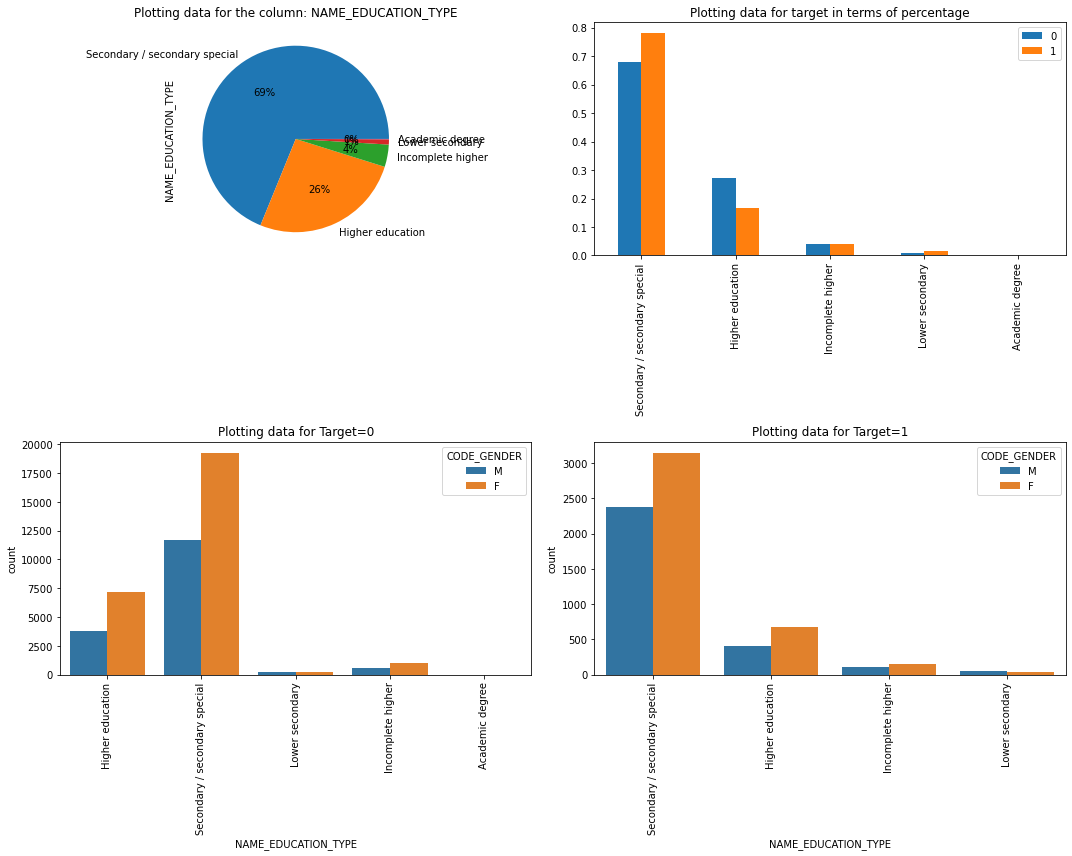

In [129]:
plotting_bi('NAME_EDUCATION_TYPE','CODE_GENDER')

### Observation
- The clients who have secondary/secondary special education apply for more loans. In this Female gender apply for more loans.

## Plotting for 'NAME_EDUCATION_TYPE' and 'NAME_CONTRACT_STATUS'

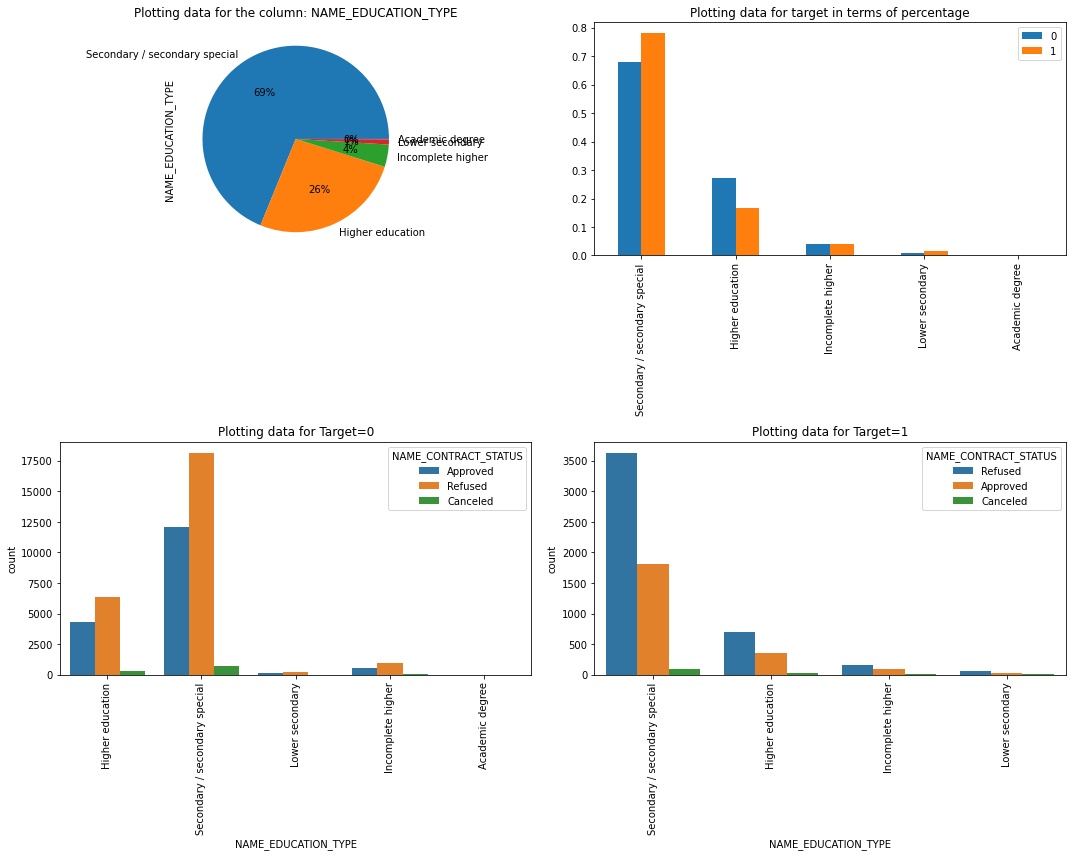

In [130]:
plotting_bi('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')

### Observation
- The clients have education status higher education and secondary/secondary special are applying the high number of loans and the refusal counts are higher than approved count.

## Plotting for 'NAME_FAMILY_STATUS' and 'NAME_CONTRACT_STATUS'

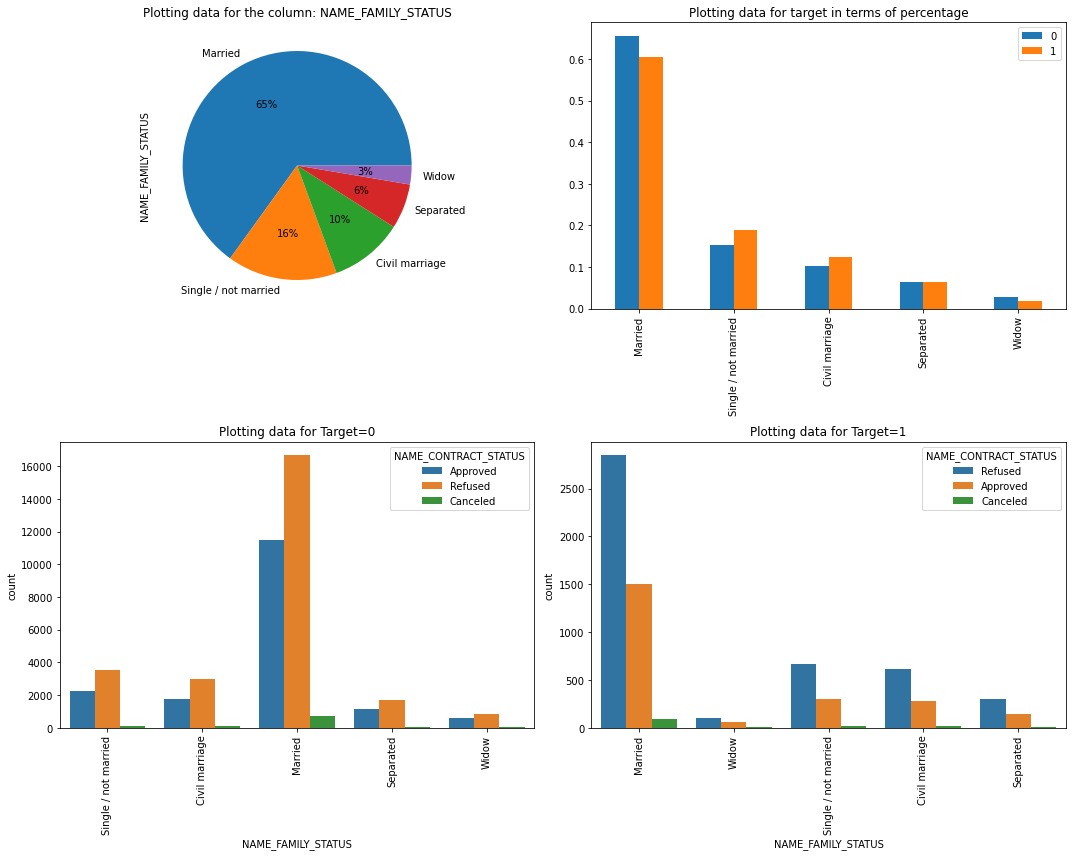

In [131]:
plotting_bi('NAME_FAMILY_STATUS','NAME_CONTRACT_STATUS')

### Observations
- Married people applying the high number of loans.
- Client's who are not married & civil marriage having a high defaulter percentage than the non-defaulting percentage.

## Plotting for 'NAME_HOUSING_TYPE' and 'NAME_CONTRACT_STATUS'

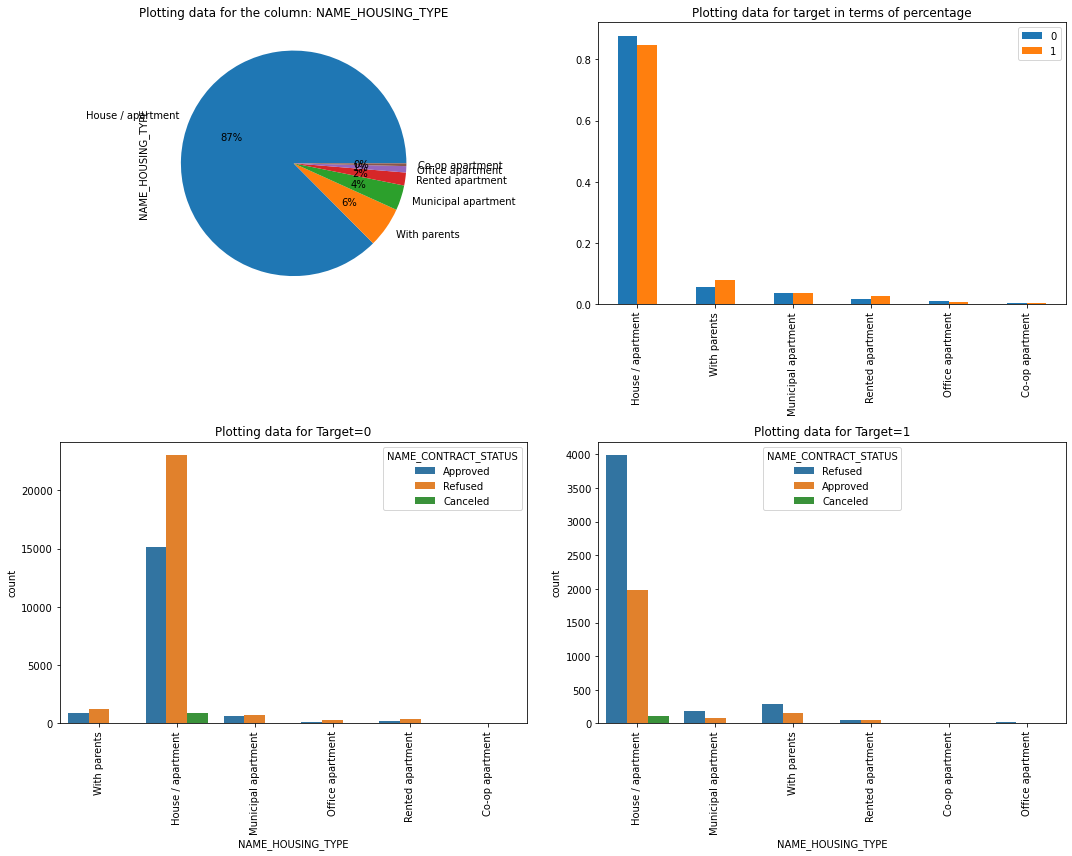

In [132]:
plotting_bi('NAME_HOUSING_TYPE','NAME_CONTRACT_STATUS')

### Observation
- Clients who are having house/apartments are applying the high number of loans.

## Plotting various chart for ORGANIZATION_TYPE

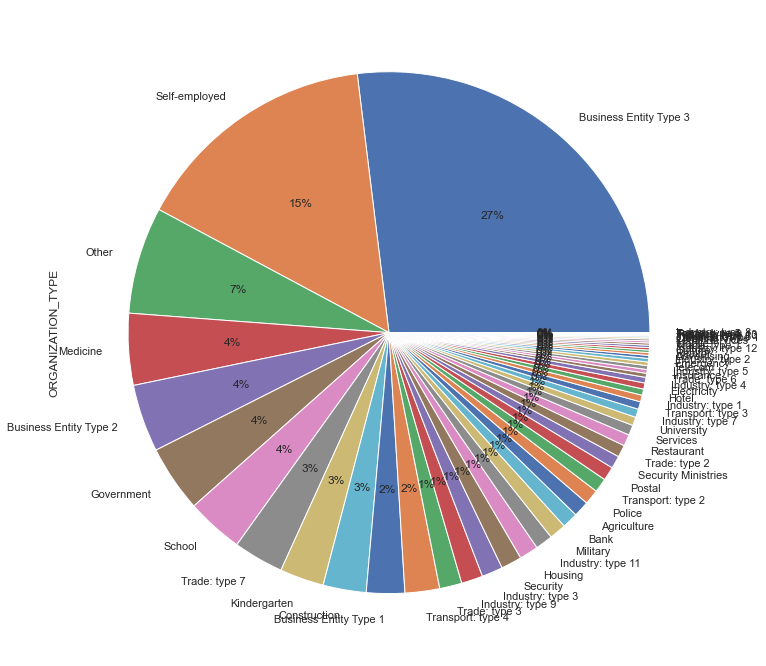

In [133]:
sns.set(rc={'figure.figsize':(15,12)})
app_df['ORGANIZATION_TYPE'].value_counts().plot.pie(autopct = "%1.0f%%");

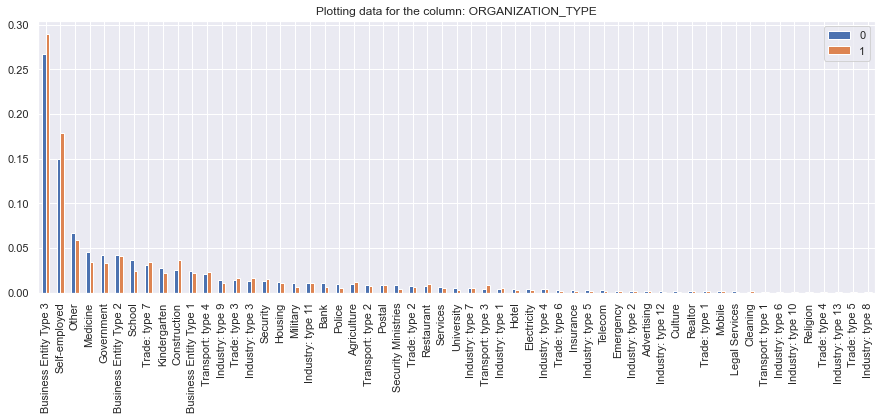

In [134]:
df = pd.DataFrame()
df['0']= ((target0_df['ORGANIZATION_TYPE'].value_counts())/len(target0_df))
df['1']= ((target1_df['ORGANIZATION_TYPE'].value_counts())/len(target1_df))
sns.set(rc={'figure.figsize':(15,5)})
df.plot.bar()
plt.title('Plotting data for the column: ORGANIZATION_TYPE');

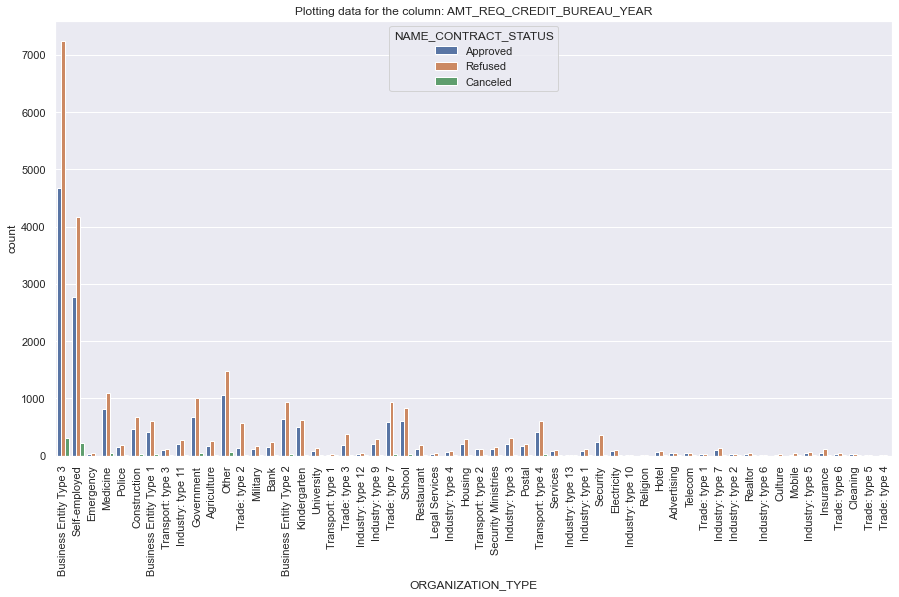

In [135]:
fig = plt.figure(figsize=(15,8))

sns.countplot(x='ORGANIZATION_TYPE', hue='NAME_CONTRACT_STATUS', data=target0_merged_df)
plt.xticks(rotation=90)
plt.title('Plotting data for the column: '+ col);

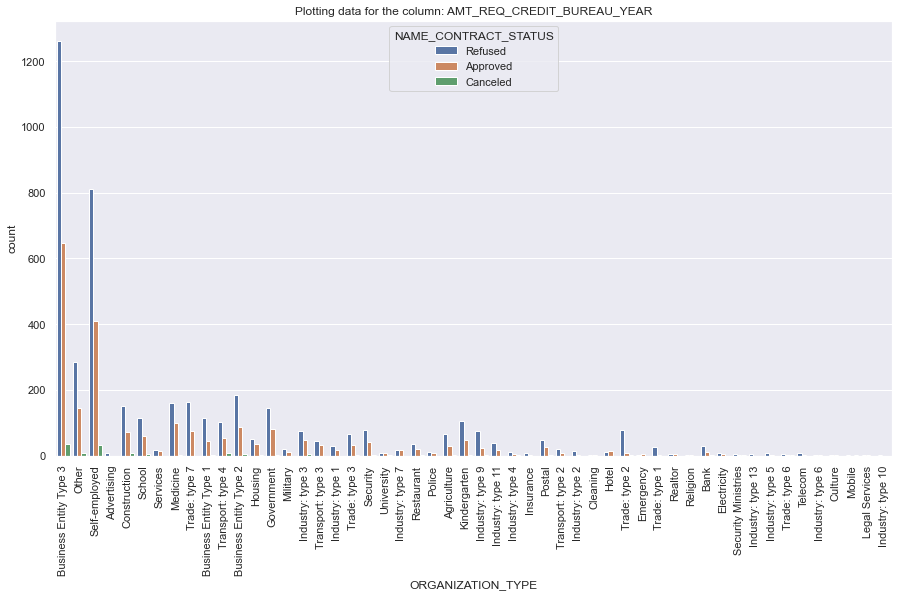

In [136]:
fig = plt.figure(figsize=(15,8))

sns.countplot(x='ORGANIZATION_TYPE', hue='NAME_CONTRACT_STATUS', data=target1_merged_df)
plt.xticks(rotation=90)
plt.title('Plotting data for the column: '+ col);

### Observation
- Clients who are having organization type as the business entity type-3 and self-employed are applying for more loans and having more defaulters count.